In [2]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import torchvision
import numpy as np
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import copy
import os
import traceback
import datetime
from torchvision import datasets, transforms, models
from efficientnet_pytorch import EfficientNet
import math
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import cv2
import pandas as pd

In [3]:
male_test_dir = 'TestDataset/CroppedFaces/1/'
female_test_dir = 'TestDataset/CroppedFaces/0/'

# EfficientNet trained on WiderFaces

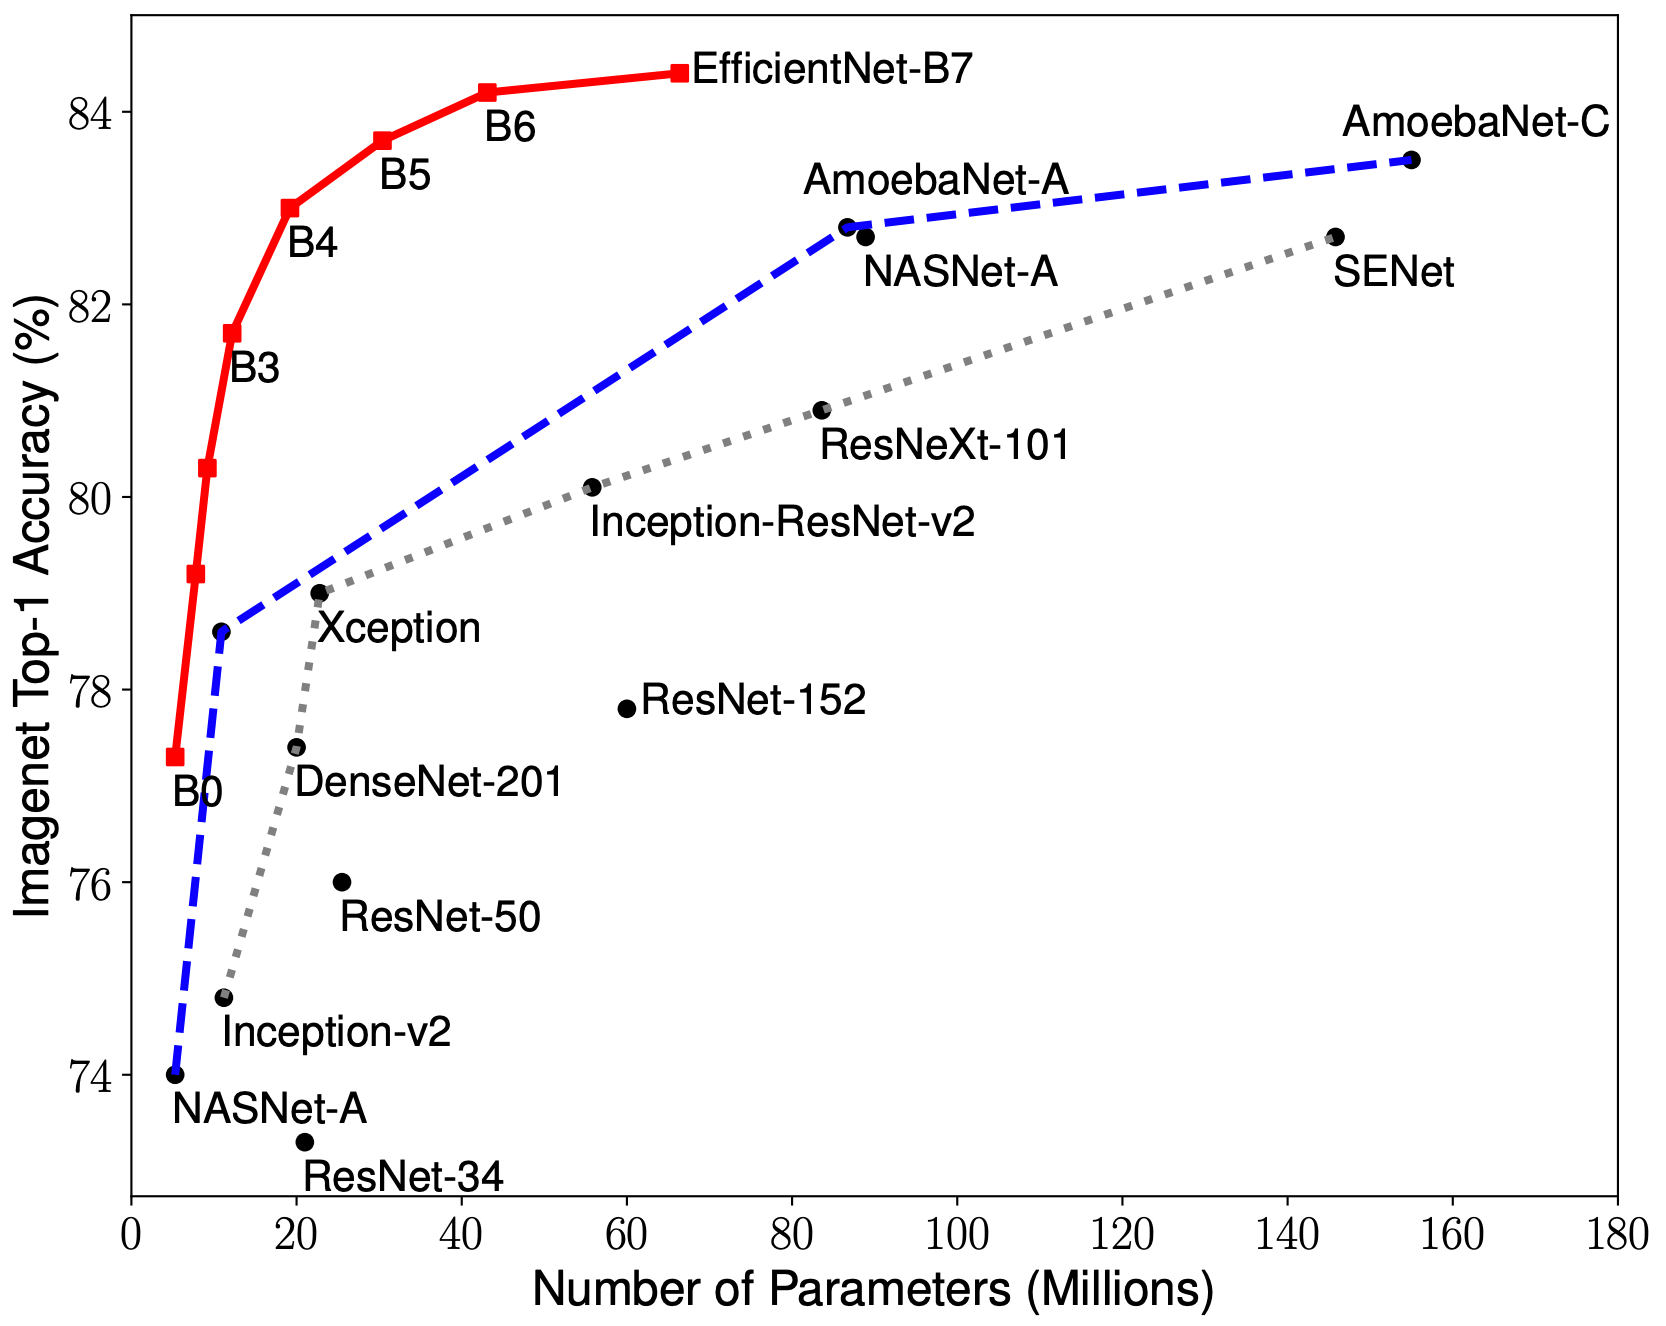

In [101]:
train_loss_b4 = np.array([0.59985099, 0.56365057, 0.55195486, 0.54679735, 0.53908001,
       0.5342011 , 0.53069071, 0.52794463, 0.52921178, 0.52971087,
       0.525452  , 0.5253335 , 0.52518364, 0.52081931, 0.52084775,
       0.52326544, 0.52185264, 0.5234638 , 0.52026343, 0.52350796,
       0.52316783, 0.52188409, 0.5198656 , 0.51939222, 0.51874303,
       0.52051153, 0.52000468, 0.51827887, 0.51800349, 0.51918827,
       0.51930214, 0.51656442, 0.51645   , 0.51684091, 0.51794271,
       0.51616254, 0.51703963, 0.51948734, 0.51900152, 0.51573063,
       0.51642533, 0.51777791, 0.51816169, 0.52035771, 0.51714839,
       0.51864058])

In [102]:
train_loss_b2 = np.array([0.6052186 , 0.56911385, 0.5574453 , 0.55016615, 0.54168102,
       0.53894525, 0.53446001, 0.53152139, 0.53218537, 0.53115029,
       0.52659135, 0.52361184, 0.52186587, 0.52220552, 0.52411116,
       0.52279879, 0.52124053, 0.52083742, 0.52303386, 0.52011177,
       0.52033576, 0.5185603 , 0.52080499, 0.52124911, 0.52336861,
       0.52385182, 0.51835908, 0.51742606, 0.51776006, 0.52208002,
       0.5215389 , 0.51827229, 0.5181963 , 0.519534  , 0.51791218,
       0.5208478 , 0.51998415, 0.51815542, 0.51819823, 0.51872568,
       0.51862968, 0.51707046, 0.51623882, 0.51550393, 0.5155136 ,
       0.51570724, 0.51681575, 0.51560851, 0.51775145, 0.52019937,
       0.51687286, 0.51716193, 0.51615627, 0.51437265, 0.5131944 ,
       0.51548408, 0.51490865, 0.51211991, 0.51397634, 0.51724344,
       0.51672456, 0.51425292, 0.51556877, 0.51441405, 0.51428412,
       0.51329801, 0.51713841, 0.51626742, 0.51434804, 0.51466166,
       0.51629464, 0.51677432, 0.51557726, 0.51343675, 0.51304958,
       0.5150763 , 0.51453029])

In [103]:
train_loss_b0 = np.array([0.60856076, 0.57111408, 0.56099927, 0.55100713, 0.54825293,
       0.54394683, 0.53996492, 0.5354263 , 0.53334227, 0.53069973,
       0.52839631, 0.52738957, 0.52686879, 0.5241123 , 0.52378575,
       0.52310428, 0.52252396, 0.52261295, 0.52228643, 0.52185731,
       0.52134645, 0.51845763, 0.51941696, 0.51881798, 0.52049083,
       0.5188519 , 0.51859298, 0.52013841, 0.52021711, 0.51773428,
       0.51545191, 0.51574762, 0.51617709, 0.51644041, 0.5157785 ,
       0.51686641, 0.51540858, 0.51500336, 0.51501249, 0.51628815,
       0.51571677, 0.51459266, 0.51391325, 0.51446047, 0.51389925,
       0.51506632, 0.51373299, 0.51296119, 0.51623298, 0.51637701,
       0.51739708, 0.51638749, 0.51580694, 0.51584595, 0.51818495,
       0.51472711, 0.51504064, 0.51506162, 0.51875502, 0.5135307 ,
       0.51279921, 0.51405837, 0.5130916 , 0.51420885, 0.51471513,
       0.51377036, 0.51513551, 0.51481467, 0.51644905, 0.51559136,
       0.51441392, 0.51687581, 0.51259916, 0.51224624, 0.51268969,
       0.51415301, 0.51350467, 0.51389328, 0.51517838, 0.51422734,
       0.51297072, 0.51421655, 0.51216522, 0.51387969, 0.51533993,
       0.51430353, 0.51533056, 0.51539622, 0.51447393, 0.51307328,
       0.51401379, 0.51558578, 0.51619216, 0.5127755 , 0.51366809,
       0.51281459, 0.51342048, 0.51236066, 0.51167401, 0.51235478,
       0.51243799, 0.51199771, 0.51168784, 0.51292284, 0.51207089,
       0.5139119 , 0.51293784, 0.51303459, 0.5124369 , 0.51729528,
       0.51236272, 0.51111084, 0.51069446, 0.51310922])

In [104]:
train_loss_resnet_50 = np.array([0.64653235, 0.6203505 , 0.61718526, 0.61393385, 0.61307396,
       0.61182842, 0.61240318, 0.61031286, 0.6098428 , 0.60857303,
       0.60850796, 0.60867264, 0.60902749, 0.60466904, 0.6079799 ,
       0.607366  , 0.60490584, 0.60805841, 0.60660642, 0.6055448 ,
       0.60535359, 0.60741585, 0.60462402, 0.6041952 , 0.60272666,
       0.60244788, 0.60303182, 0.60419609, 0.60242472, 0.60225578,
       0.60301199, 0.60206481, 0.60140062, 0.59988652, 0.59918293,
       0.60084441, 0.59798817, 0.59897382, 0.599241  , 0.59663436,
       0.59781739, 0.5958732 , 0.59572171, 0.59482191, 0.59500719,
       0.5978633 , 0.59482827, 0.59347686, 0.5924632 , 0.59191896,
       0.59385116, 0.58978909, 0.59220737, 0.59203889, 0.59018709,
       0.5877888 , 0.59091345, 0.58771855, 0.58886294, 0.58689065,
       0.58511811, 0.58576459, 0.58548203, 0.58721575, 0.58681743,
       0.58577648, 0.58473845, 0.58403157, 0.58478771, 0.58363727,
       0.58310269, 0.58100876, 0.58186875])

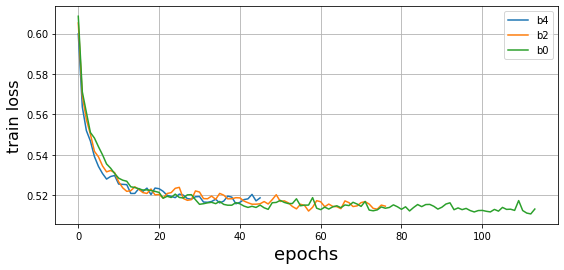

In [107]:
def draw_trainloss():
    fig = plt.figure()
    fig.set_size_inches(9, 4)

    min_loss = min(np.concatenate((train_loss_b4, train_loss_b2, train_loss_b0, train_loss_resnet_50)))
    #plt.axline((0,min_loss), (len(train_loss_b4),min_loss))
    plt.plot(range(0, len(train_loss_b4)),train_loss_b4, label='b4')
    plt.plot(range(0, len(train_loss_b2)),train_loss_b2, label='b2')
    plt.plot(range(0, len(train_loss_b0)),train_loss_b0, label='b0')
    #plt.plot(range(0, len(train_loss_resnet_50)),train_loss_resnet_50, label='resnet')
    plt.legend()
    plt.grid(True)
    plt.xlabel('epochs', fontsize=18)
    plt.ylabel('train loss', fontsize=16)
draw_trainloss()

In [ ]:
f1_b4_more_epoch = np.array([0.77234825, 0.85938961, 0.88914612, 0.90028133, 0.92052184,
       0.93542485, 0.93772361, 0.94581791, 0.94291558, 0.94267163,
       0.95253327, 0.9521066 , 0.95210683, 0.96359274, 0.96407998,
       0.95581637, 0.96173501, 0.95585346, 0.9649098 , 0.95628248,
       0.95670557, 0.95931586, 0.96537666, 0.9649179 , 0.96834817,
       0.96228779, 0.96415561, 0.97018646, 0.96803818, 0.9657293 ,
       0.96649631, 0.97184706, 0.97163587, 0.97275875, 0.97001996,
       0.97482568, 0.97187484, 0.96504725, 0.96747651, 0.97451388,
       0.97274471, 0.97104397, 0.9677098 , 0.96330232, 0.97124903,
       0.96994772])

In [117]:
f1_b0 = np.array([0.74553584, 0.84417013, 0.86901644, 0.89541713, 0.89675685,
       0.90837259, 0.91768327, 0.92634407, 0.93334793, 0.93861419,
       0.94485894, 0.94655801, 0.94916649, 0.95617493, 0.95445069,
       0.95658784, 0.95878777, 0.95785487, 0.95943976, 0.96222041,
       0.96219046, 0.96698898, 0.96636926, 0.96855329, 0.96508292,
       0.96673766, 0.9685896 , 0.96372741, 0.96355993, 0.96858601,
       0.97458905, 0.97481998, 0.97297571, 0.97232471, 0.97274618,
       0.97237567, 0.976833  , 0.97703221, 0.97615728, 0.97325634,
       0.97410607, 0.97756957, 0.9799869 , 0.9780846 , 0.97902839,
       0.97659952, 0.97889293, 0.98050815, 0.97359794, 0.97349262,
       0.97159137, 0.97328786, 0.97337079, 0.9760215 , 0.96954808,
       0.97755936, 0.97534928, 0.97690441, 0.97005164, 0.97907219,
       0.981873  , 0.97907422, 0.980598  , 0.97880763, 0.97807784,
       0.9785275 , 0.97552325, 0.97677667, 0.97257429, 0.97469843,
       0.97826804, 0.97315162, 0.98303544, 0.98241418, 0.9819695 ,
       0.97877178, 0.98135277, 0.98030618, 0.97650908, 0.97942035,
       0.98202513, 0.97807217, 0.98337719, 0.9786321 , 0.97544576,
       0.97860466, 0.97777321, 0.97710191, 0.97701971, 0.98171948,
       0.97930736, 0.97490165, 0.97325395, 0.98252318, 0.9788002 ,
       0.98258004, 0.98151398, 0.98345829, 0.9834708 , 0.98229496,
       0.9823409 , 0.98360852, 0.98448353, 0.98209729, 0.98259339,
       0.97781158, 0.98132296, 0.98118523, 0.98278916, 0.97040269,
       0.98126554, 0.98543539, 0.98576891, 0.98159647])

In [ ]:
resnet_50_f1 = np.array([0.51717312, 0.70026124, 0.70427031, 0.71696337, 0.72075081,
       0.72430848, 0.72565674, 0.73229351, 0.7314867 , 0.73884242,
       0.73105033, 0.74530534, 0.73810617, 0.75299731, 0.73917709,
       0.7367179 , 0.75003489, 0.73559505, 0.74430069, 0.74487025,
       0.74826724, 0.73252256, 0.74855785, 0.74808751, 0.76021572,
       0.75643408, 0.76173415, 0.74940503, 0.75284194, 0.76377917,
       0.75198575, 0.75605644, 0.76123852, 0.76048536, 0.76017506,
       0.76123278, 0.77529628, 0.76634178, 0.76838224, 0.77133836,
       0.76738398, 0.77703093, 0.77775145, 0.77535304, 0.77924553,
       0.77245922, 0.78082615, 0.77879033, 0.78717026, 0.78609693,
       0.77751601, 0.79018782, 0.79049522, 0.78437521, 0.79236709,
       0.79738984, 0.78992533, 0.80163305, 0.79780963, 0.80270017,
       0.80481374, 0.80367896, 0.80251467, 0.80085923, 0.79763415,
       0.80295778, 0.80918511, 0.81147141, 0.80700816, 0.80831296,
       0.81155167, 0.8167119 , 0.81617485])

In [4]:
from efficientnet_pytorch import EfficientNet
class MyModel(nn.Module):
    def __init__(self, model_name: str):
        super(MyModel,self).__init__()

        # self.model = torch.hub.load('pytorch/vision:v0.9.0', 'inception_v3', pretrained=True)
        self.model = EfficientNet.from_pretrained(model_name)
        self.model.set_swish(memory_efficient=False)
        self.linear1 = torch.nn.Linear(1000, 1)
        self.activation3 = torch.nn.Sigmoid()

    def forward(self,x):
        answ = self.model(x)
        #print(answ.shape)
        #answ = self.encoder(answ)
        #print(answ.shape)
        answ = self.activation3(self.linear1(answ))

        return answ


In [5]:
transform_efnet=transforms.Compose([transforms.Resize((150,150)),
                              transforms.ToTensor()
                              ])

In [6]:
def init_ef_model(model_name, model_path):
    device = torch.device('cpu')
    model = MyModel(model_name)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval();
    return model

In [7]:
def get_res_efnet(image_path: str, model: MyModel):
    image = Image.open(image_path)
    image = transform_efnet(image).unsqueeze(0)

    # model.cuda()
    # Set layers such as dropout and batchnorm in evaluation mode
    # model.eval();

    # Get the 1000-dimensional model output
    with torch.no_grad():
        out = model(image)
    print(out.detach().numpy()[0][0])    
    return out.detach().numpy()[0][0]

## EfficientNet-b0

In [8]:
model_b0_name = 'efficientnet-b0'
model_b0_path = 'PretrainedModels/Ours/ef_b0.pth'

In [9]:
b0_model = init_ef_model(model_b0_name, model_b0_path)

Loaded pretrained weights for efficientnet-b0


In [191]:
def get_res_b0(image_path: str):
    return get_res_efnet(image_path, b0_model)

In [87]:
acc_b0, prec_b0, rec_b0, f1_b0 = get_scores(get_res_b0)

TP: 170, FP: 14, TN: 100, FN: 25
Metrics:
Accuracy: 0.8737864077669902
Precision: 0.9239130434782609
Recall: 0.8717948717948718
F1_Score: 0.8970976253298153


In [117]:
min_time_b0, max_time_b0, avg_time_b0 = get_times(get_res_b0)

Time:
Min time: 0.2373650074005127
Max time: 0.3919520378112793
Avg time: 0.27817320251464844


In [1]:
image_path = 'TestDataset/CroppedFaces/0/131_f.jpg'
image = cv2.imread(image_path) 
fig=plt.figure(figsize=(5, 5))
plt.imshow(convert2RGB(image))
start_time = time.time()
gender = get_res_efnet(image_path, b0_model)
time.time() - start_time
print(round(time.time() - start_time, 2), 'sec on CPU')
print('Male' if gender == 1 else 'Female')

NameError: name 'cv2' is not defined

## EfficientNet-b2

In [32]:
model_b2_name = 'efficientnet-b2'
model_b2_path = 'PretrainedModels/Ours/ef_b2_more_epochs.pth'

In [89]:
b2_model = init_ef_model(model_b2_name, model_b2_path)

Loaded pretrained weights for efficientnet-b2


In [90]:
def get_res_b2(image_path: str):
    return get_res_efnet(image_path, b2_model)

In [91]:
acc_b2, prec_b2, rec_b2, f1_b2 = get_scores(get_res_b2)

TP: 173, FP: 17, TN: 97, FN: 22
Metrics:
Accuracy: 0.8737864077669902
Precision: 0.9105263157894737
Recall: 0.8871794871794871
F1_Score: 0.8987012987012988


In [112]:
min_time_b2, max_time_b2, avg_time_b2 = get_times(get_res_b2)

Time:
Min time: 0.3919541835784912
Max time: 1.1987965106964111
Avg time: 0.5123051686286926


## EfficientNet-b4

In [92]:
model_b4_name = 'efficientnet-b4'
model_b4_path = 'PretrainedModels/Ours/ef_b4.pth'

In [93]:
b4_model = init_ef_model(model_b4_name, model_b4_path)

Loaded pretrained weights for efficientnet-b4


In [94]:
def get_res_b4(image_path: str):
    return get_res_efnet(image_path, b4_model)

In [95]:
acc_b4, prec_b4, rec_b4, f1_b4 = get_scores(get_res_b4)

TP: 175, FP: 19, TN: 95, FN: 20
Metrics:
Accuracy: 0.8737864077669902
Precision: 0.9020618556701031
Recall: 0.8974358974358975
F1_Score: 0.8997429305912596


In [113]:
min_time_b4, max_time_b4, avg_time_b4 = get_times(get_res_b4)

Time:
Min time: 0.7619607448577881
Max time: 1.6595890522003174
Avg time: 0.8659273972511291


# Gil Levi and Tal Hassner model trained on Adience

In [97]:
genderProto = "PretrainedModels/gender_deploy.prototxt"
genderModel = "PretrainedModels/gender_net.caffemodel"

In [98]:
def get_res_adience(image_path):
    genderNet = cv2.dnn.readNet(genderModel, genderProto)
    genderList = ['Male', 'Female']
    face = cv2.imread(image_path)
    MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
    blob = cv2.dnn.blobFromImage(face, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
    genderNet.setInput(blob)
    genderPreds = genderNet.forward()
    gender = genderList[genderPreds[0].argmax()]
    if gender == 'Female':
        return 0
    else:
        return 1

In [99]:
acc_adience, prec_adience, rec_adience, f1_adience = get_scores(get_res_adience)

TP: 117, FP: 14, TN: 100, FN: 78
Metrics:
Accuracy: 0.7022653721682848
Precision: 0.8931297709923665
Recall: 0.6
F1_Score: 0.7177914110429446


In [114]:
min_time_adience, max_time_adience, avg_time_adience = get_times(get_res_adience)

Time:
Min time: 0.11764931678771973
Max time: 0.24235272407531738
Avg time: 0.13374355888366699


# VGG-Face model trained on IMDb-Wiki

In [100]:
from deepface import DeepFace

In [101]:
def get_res_vgg_imdb(image_path):
    obj = DeepFace.analyze(image_path, actions = ['gender'], enforce_detection=False)
    gender = obj['gender']
    res = 1 if gender == 'Man' else 0
    clear_output()
    return res

In [102]:
acc_vgg_imdb, prec_vgg_imdb, rec_vgg_imdb, f1_vgg_imdb = get_scores(get_res_vgg_imdb)

TP: 192, FP: 104, TN: 10, FN: 3
Metrics:
Accuracy: 0.6537216828478964
Precision: 0.6486486486486487
Recall: 0.9846153846153847
F1_Score: 0.7820773930753564


In [115]:
min_time_vgg_imdb, max_time_vgg_imdb, avg_time_vgg_imdb = get_times(get_res_vgg_imdb)

Time:
Min time: 1.568796157836914
Max time: 2.8674840927124023
Avg time: 1.7493990716934205


# FairFace

In [103]:
import dlib

In [104]:
def get_res_fairface(image_path):
    device = torch.device('cpu')
    model_fair_4 = torchvision.models.resnet34(pretrained=True)
    model_fair_4.fc = nn.Linear(model_fair_4.fc.in_features, 18)
    model_fair_4.load_state_dict(torch.load('PretrainedModels/fairface_alldata_4race_20191111.pt', map_location=device))
    model_fair_4 = model_fair_4.to(device)
    model_fair_4.eval()
    trans = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = dlib.load_rgb_image(image_path)
    image = trans(image)
    image = image.view(1, 3, 224, 224)  # reshape image to match model dimensions (1 batch size)
    image = image.to(device)

    # fair
    with torch.no_grad():
        outputs = model_fair_4(image)
        outputs = outputs.cpu().detach().numpy()
        outputs = np.squeeze(outputs)

    gender_outputs = outputs[7:9]
    gender_score = np.exp(gender_outputs) / np.sum(np.exp(gender_outputs))
    gender_pred = np.argmax(gender_score)
    return 1 if gender_pred == 0 else 0

In [105]:
acc_fairface, prec_fairface, rec_fairface, f1_fairface = get_scores(get_res_fairface)

TP: 175, FP: 36, TN: 78, FN: 20
Metrics:
Accuracy: 0.8187702265372169
Precision: 0.8293838862559242
Recall: 0.8974358974358975
F1_Score: 0.8620689655172414


In [116]:
min_time_fairface, max_time_fairface, avg_time_fairface = get_times(get_res_fairface)

Time:
Min time: 0.8669397830963135
Max time: 1.6116909980773926
Avg time: 0.9408698883056641


In [74]:
get_res_fairface('TestDataset/CroppedFaces/0/76_f.jpg')

0

# Helpers

In [1]:
def convert2RGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [96]:
def get_scores(get_res):
    """
    get_res -- function with input 'image_path' and output -- result of analysis
    """
    TP = 0
    FP = 0
    TN = 0
    FN = 0    
    # males
    for image_name in os.listdir(male_test_dir):
        image_path = male_test_dir + image_name
        res = get_res(image_path)
        if (res >= 0.5):
            TP += 1
        else: 
            FN += 1
    # females
    for image_name in os.listdir(female_test_dir):
        image_path = female_test_dir + image_name
        res = get_res(image_path)
        if (res < 0.5):
            TN += 1
        else: 
            FP += 1
            
    acc = accuracy(TP, TN, FP, FN)
    prec = precision(TP, FP)
    rec = recall(TP, FN)
    f1 = f_1(prec, rec)
    
    print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
    print('=======================================')
    print(color.BOLD + 'Metrics:' + color.END)
    print(f'Accuracy: {acc}')
    print(f'Precision: {prec}')
    print(f'Recall: {rec}')
    print(f'F1_Score: {f1}')
    
    return acc, prec, rec, f1

In [111]:
def get_times(get_res):
    times = []
    test_image_path = 'TestDataset/CroppedFaces/1/0_m.jpg'
    for i in range(0, 1000):
        start_time = time.time()
        get_res(test_image_path)
        ellapsed = time.time() - start_time
        times.append(ellapsed)
    
    min_time = min(times)
    max_time = max(times)
    avg_time = sum(times)/len(times)
    
    print(color.BOLD + 'Time:' + color.END)
    print(f'Min time: {min_time}')
    print(f'Max time: {max_time}')
    print(f'Avg time: {avg_time}')
    
    return min_time, max_time, avg_time

In [42]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [43]:
def accuracy(TP, TN, FP, FN):
    return (TP + TN)/(TP + TN + FP + FN)

In [44]:
def precision(TP, FP):
    return TP/(TP + FP)

In [45]:
def recall(TP, FN):
    return TP/(TP + FN)

In [46]:
def f_1(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

In [110]:
def build_score_board():
    df = pd.DataFrame([['EfficientNet-B0','Our', '0.874', '0.924', '0.872', '0.897'], 
                      ['EfficientNet-B2', 'Our', '0.874', '0.911', '0.887', '0.899'],
                      ['EfficientNet-B4', 'Our', '0.874', '0.902', '0.897', '0.9'],
                      ['Gil Levi model', 'Adience', '0.702', '0.893', '0.6', '0.718'],
                      ['VGG-Face', 'IMDb-Wiki', '0.654', '0.649', '0.985', '0.782'],
                      ['FairFace', 'FairFace', '0.819', '0.829', '0.897', '0.862']],
              columns=['Method', 'Trained on', 'Accuracy', 'Precision', 'Recall', 'F1'])    
    return df

In [111]:
def build_time_board():
    df = pd.DataFrame([['EfficientNet-B0', '0.24', '0.39', '0.28'], 
                      ['EfficientNet-B2', '0.39', '1.2', '0.51'],
                      ['EfficientNet-B4', '0.76', '1.66', '0.87'],
                      ['Gil Levi model', '0.12', '0.24', '0.13'],
                      ['VGG-Face', '1.57', '2.87', '1.75'],
                      ['FairFace', '0.87', '1.61', '0.94']],
              columns=['Method', 'Min time', 'Max time', 'Avg time'])    
    return df

In [112]:
df = build_score_board()
df.style.set_properties(**{'text-align': 'center'}).hide_index()

Method,Trained on,Accuracy,Precision,Recall,F1
EfficientNet-B0,Our,0.874,0.924,0.872,0.897
EfficientNet-B2,Our,0.874,0.911,0.887,0.899
EfficientNet-B4,Our,0.874,0.902,0.897,0.9
Gil Levi model,Adience,0.702,0.893,0.6,0.718
VGG-Face,IMDb-Wiki,0.654,0.649,0.985,0.782
FairFace,FairFace,0.819,0.829,0.897,0.862


In [98]:
# print(df.to_latex())

In [99]:
df = build_time_board()
df.style.set_properties(**{'text-align': 'center'}).hide_index()

Method,Min time,Max time,Avg time
EfficientNet-B0,0.24,0.39,0.28
EfficientNet-B2,0.39,1.2,0.51
EfficientNet-B4,0.76,1.66,0.87
Gil Levi model,0.12,0.24,0.13
VGG-Face,1.57,2.87,1.75
FairFace,0.87,1.61,0.94


### Adience dataset: 
1. https://learnopencv.com/age-gender-classification-using-opencv-deep-learning-c-python/
2. agegenderLMTCNN -- https://github.com/ivclab/agegenderLMTCNN

### IMDb-Wiki dataset:
1. https://github.com/serengil/deepface

### VGG2Face:
1. https://github.com/ox-vgg/vgg_face2

In [113]:
df = pd.DataFrame([['EfficientNet-B0', '0.912', '0.912', '0.919', '0.948'], 
                      ['EfficientNet-B2', '0.969', '0.978', '0.959', '0.969'],
                      ['EfficientNet-B4', '0.969', '0.977', '0.965', '0.968']],
              columns=['Method', 'Accuracy', 'Precision', 'Recall', 'F1'])  

df.style.set_properties(**{'text-align': 'center'}).hide_index()

Method,Accuracy,Precision,Recall,F1
EfficientNet-B0,0.912,0.912,0.919,0.948
EfficientNet-B2,0.969,0.978,0.959,0.969
EfficientNet-B4,0.969,0.977,0.965,0.968


In [176]:
import torch
import torch.nn as nn


class Senet50_ft_dag(nn.Module):

    def __init__(self):
        super(Senet50_ft_dag, self).__init__()
        self.meta = {'mean': [131.0912, 103.8827, 91.4953],
                     'std': [1, 1, 1],
                     'imageSize': [224, 224, 3]}
        self.conv1_7x7_s2 = nn.Conv2d(3, 64, kernel_size=[7, 7], stride=(2, 2), padding=(3, 3), bias=False)
        self.conv1_7x7_s2_bn = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv1_relu_7x7_s2 = nn.ReLU()
        self.pool1_3x3_s2 = nn.MaxPool2d(kernel_size=[3, 3], stride=[2, 2], padding=(0, 0), dilation=1, ceil_mode=True)
        self.conv2_1_1x1_reduce = nn.Conv2d(64, 64, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv2_1_1x1_reduce_bn = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_1_1x1_reduce_relu = nn.ReLU()
        self.conv2_1_3x3 = nn.Conv2d(64, 64, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv2_1_3x3_bn = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_1_3x3_relu = nn.ReLU()
        self.conv2_1_1x1_increase = nn.Conv2d(64, 256, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv2_1_1x1_increase_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_1_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv2_1_1x1_down = nn.Conv2d(256, 16, kernel_size=[1, 1], stride=(1, 1))
        self.conv2_1_1x1_down_relu = nn.ReLU()
        self.conv2_1_1x1_up = nn.Conv2d(16, 256, kernel_size=[1, 1], stride=(1, 1))
        self.conv2_1_prob = nn.Sigmoid()
        self.conv2_1_1x1_proj = nn.Conv2d(64, 256, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv2_1_1x1_proj_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_1_relu = nn.ReLU()
        self.conv2_2_1x1_reduce = nn.Conv2d(256, 64, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv2_2_1x1_reduce_bn = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_2_1x1_reduce_relu = nn.ReLU()
        self.conv2_2_3x3 = nn.Conv2d(64, 64, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv2_2_3x3_bn = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_2_3x3_relu = nn.ReLU()
        self.conv2_2_1x1_increase = nn.Conv2d(64, 256, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv2_2_1x1_increase_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_2_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv2_2_1x1_down = nn.Conv2d(256, 16, kernel_size=[1, 1], stride=(1, 1))
        self.conv2_2_1x1_down_relu = nn.ReLU()
        self.conv2_2_1x1_up = nn.Conv2d(16, 256, kernel_size=[1, 1], stride=(1, 1))
        self.conv2_2_prob = nn.Sigmoid()
        self.conv2_2_relu = nn.ReLU()
        self.conv2_3_1x1_reduce = nn.Conv2d(256, 64, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv2_3_1x1_reduce_bn = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_3_1x1_reduce_relu = nn.ReLU()
        self.conv2_3_3x3 = nn.Conv2d(64, 64, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv2_3_3x3_bn = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_3_3x3_relu = nn.ReLU()
        self.conv2_3_1x1_increase = nn.Conv2d(64, 256, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv2_3_1x1_increase_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2_3_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv2_3_1x1_down = nn.Conv2d(256, 16, kernel_size=[1, 1], stride=(1, 1))
        self.conv2_3_1x1_down_relu = nn.ReLU()
        self.conv2_3_1x1_up = nn.Conv2d(16, 256, kernel_size=[1, 1], stride=(1, 1))
        self.conv2_3_prob = nn.Sigmoid()
        self.conv2_3_relu = nn.ReLU()
        self.conv3_1_1x1_reduce = nn.Conv2d(256, 128, kernel_size=[1, 1], stride=(2, 2), bias=False)
        self.conv3_1_1x1_reduce_bn = nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_1_1x1_reduce_relu = nn.ReLU()
        self.conv3_1_3x3 = nn.Conv2d(128, 128, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv3_1_3x3_bn = nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_1_3x3_relu = nn.ReLU()
        self.conv3_1_1x1_increase = nn.Conv2d(128, 512, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv3_1_1x1_increase_bn = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_1_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv3_1_1x1_down = nn.Conv2d(512, 32, kernel_size=[1, 1], stride=(1, 1))
        self.conv3_1_1x1_down_relu = nn.ReLU()
        self.conv3_1_1x1_up = nn.Conv2d(32, 512, kernel_size=[1, 1], stride=(1, 1))
        self.conv3_1_prob = nn.Sigmoid()
        self.conv3_1_1x1_proj = nn.Conv2d(256, 512, kernel_size=[1, 1], stride=(2, 2), bias=False)
        self.conv3_1_1x1_proj_bn = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_1_relu = nn.ReLU()
        self.conv3_2_1x1_reduce = nn.Conv2d(512, 128, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv3_2_1x1_reduce_bn = nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_2_1x1_reduce_relu = nn.ReLU()
        self.conv3_2_3x3 = nn.Conv2d(128, 128, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv3_2_3x3_bn = nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_2_3x3_relu = nn.ReLU()
        self.conv3_2_1x1_increase = nn.Conv2d(128, 512, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv3_2_1x1_increase_bn = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_2_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv3_2_1x1_down = nn.Conv2d(512, 32, kernel_size=[1, 1], stride=(1, 1))
        self.conv3_2_1x1_down_relu = nn.ReLU()
        self.conv3_2_1x1_up = nn.Conv2d(32, 512, kernel_size=[1, 1], stride=(1, 1))
        self.conv3_2_prob = nn.Sigmoid()
        self.conv3_2_relu = nn.ReLU()
        self.conv3_3_1x1_reduce = nn.Conv2d(512, 128, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv3_3_1x1_reduce_bn = nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_3_1x1_reduce_relu = nn.ReLU()
        self.conv3_3_3x3 = nn.Conv2d(128, 128, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv3_3_3x3_bn = nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_3_3x3_relu = nn.ReLU()
        self.conv3_3_1x1_increase = nn.Conv2d(128, 512, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv3_3_1x1_increase_bn = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_3_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv3_3_1x1_down = nn.Conv2d(512, 32, kernel_size=[1, 1], stride=(1, 1))
        self.conv3_3_1x1_down_relu = nn.ReLU()
        self.conv3_3_1x1_up = nn.Conv2d(32, 512, kernel_size=[1, 1], stride=(1, 1))
        self.conv3_3_prob = nn.Sigmoid()
        self.conv3_3_relu = nn.ReLU()
        self.conv3_4_1x1_reduce = nn.Conv2d(512, 128, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv3_4_1x1_reduce_bn = nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_4_1x1_reduce_relu = nn.ReLU()
        self.conv3_4_3x3 = nn.Conv2d(128, 128, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv3_4_3x3_bn = nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_4_3x3_relu = nn.ReLU()
        self.conv3_4_1x1_increase = nn.Conv2d(128, 512, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv3_4_1x1_increase_bn = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv3_4_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv3_4_1x1_down = nn.Conv2d(512, 32, kernel_size=[1, 1], stride=(1, 1))
        self.conv3_4_1x1_down_relu = nn.ReLU()
        self.conv3_4_1x1_up = nn.Conv2d(32, 512, kernel_size=[1, 1], stride=(1, 1))
        self.conv3_4_prob = nn.Sigmoid()
        self.conv3_4_relu = nn.ReLU()
        self.conv4_1_1x1_reduce = nn.Conv2d(512, 256, kernel_size=[1, 1], stride=(2, 2), bias=False)
        self.conv4_1_1x1_reduce_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_1_1x1_reduce_relu = nn.ReLU()
        self.conv4_1_3x3 = nn.Conv2d(256, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv4_1_3x3_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_1_3x3_relu = nn.ReLU()
        self.conv4_1_1x1_increase = nn.Conv2d(256, 1024, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv4_1_1x1_increase_bn = nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_1_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv4_1_1x1_down = nn.Conv2d(1024, 64, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_1_1x1_down_relu = nn.ReLU()
        self.conv4_1_1x1_up = nn.Conv2d(64, 1024, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_1_prob = nn.Sigmoid()
        self.conv4_1_1x1_proj = nn.Conv2d(512, 1024, kernel_size=[1, 1], stride=(2, 2), bias=False)
        self.conv4_1_1x1_proj_bn = nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_1_relu = nn.ReLU()
        self.conv4_2_1x1_reduce = nn.Conv2d(1024, 256, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv4_2_1x1_reduce_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_2_1x1_reduce_relu = nn.ReLU()
        self.conv4_2_3x3 = nn.Conv2d(256, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv4_2_3x3_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_2_3x3_relu = nn.ReLU()
        self.conv4_2_1x1_increase = nn.Conv2d(256, 1024, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv4_2_1x1_increase_bn = nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_2_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv4_2_1x1_down = nn.Conv2d(1024, 64, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_2_1x1_down_relu = nn.ReLU()
        self.conv4_2_1x1_up = nn.Conv2d(64, 1024, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_2_prob = nn.Sigmoid()
        self.conv4_2_relu = nn.ReLU()
        self.conv4_3_1x1_reduce = nn.Conv2d(1024, 256, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv4_3_1x1_reduce_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_3_1x1_reduce_relu = nn.ReLU()
        self.conv4_3_3x3 = nn.Conv2d(256, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv4_3_3x3_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_3_3x3_relu = nn.ReLU()
        self.conv4_3_1x1_increase = nn.Conv2d(256, 1024, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv4_3_1x1_increase_bn = nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_3_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv4_3_1x1_down = nn.Conv2d(1024, 64, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_3_1x1_down_relu = nn.ReLU()
        self.conv4_3_1x1_up = nn.Conv2d(64, 1024, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_3_prob = nn.Sigmoid()
        self.conv4_3_relu = nn.ReLU()
        self.conv4_4_1x1_reduce = nn.Conv2d(1024, 256, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv4_4_1x1_reduce_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_4_1x1_reduce_relu = nn.ReLU()
        self.conv4_4_3x3 = nn.Conv2d(256, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv4_4_3x3_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_4_3x3_relu = nn.ReLU()
        self.conv4_4_1x1_increase = nn.Conv2d(256, 1024, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv4_4_1x1_increase_bn = nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_4_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv4_4_1x1_down = nn.Conv2d(1024, 64, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_4_1x1_down_relu = nn.ReLU()
        self.conv4_4_1x1_up = nn.Conv2d(64, 1024, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_4_prob = nn.Sigmoid()
        self.conv4_4_relu = nn.ReLU()
        self.conv4_5_1x1_reduce = nn.Conv2d(1024, 256, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv4_5_1x1_reduce_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_5_1x1_reduce_relu = nn.ReLU()
        self.conv4_5_3x3 = nn.Conv2d(256, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv4_5_3x3_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_5_3x3_relu = nn.ReLU()
        self.conv4_5_1x1_increase = nn.Conv2d(256, 1024, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv4_5_1x1_increase_bn = nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_5_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv4_5_1x1_down = nn.Conv2d(1024, 64, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_5_1x1_down_relu = nn.ReLU()
        self.conv4_5_1x1_up = nn.Conv2d(64, 1024, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_5_prob = nn.Sigmoid()
        self.conv4_5_relu = nn.ReLU()
        self.conv4_6_1x1_reduce = nn.Conv2d(1024, 256, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv4_6_1x1_reduce_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_6_1x1_reduce_relu = nn.ReLU()
        self.conv4_6_3x3 = nn.Conv2d(256, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv4_6_3x3_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_6_3x3_relu = nn.ReLU()
        self.conv4_6_1x1_increase = nn.Conv2d(256, 1024, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv4_6_1x1_increase_bn = nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv4_6_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv4_6_1x1_down = nn.Conv2d(1024, 64, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_6_1x1_down_relu = nn.ReLU()
        self.conv4_6_1x1_up = nn.Conv2d(64, 1024, kernel_size=[1, 1], stride=(1, 1))
        self.conv4_6_prob = nn.Sigmoid()
        self.conv4_6_relu = nn.ReLU()
        self.conv5_1_1x1_reduce = nn.Conv2d(1024, 512, kernel_size=[1, 1], stride=(2, 2), bias=False)
        self.conv5_1_1x1_reduce_bn = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv5_1_1x1_reduce_relu = nn.ReLU()
        self.conv5_1_3x3 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv5_1_3x3_bn = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv5_1_3x3_relu = nn.ReLU()
        self.conv5_1_1x1_increase = nn.Conv2d(512, 2048, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv5_1_1x1_increase_bn = nn.BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv5_1_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv5_1_1x1_down = nn.Conv2d(2048, 128, kernel_size=[1, 1], stride=(1, 1))
        self.conv5_1_1x1_down_relu = nn.ReLU()
        self.conv5_1_1x1_up = nn.Conv2d(128, 2048, kernel_size=[1, 1], stride=(1, 1))
        self.conv5_1_prob = nn.Sigmoid()
        self.conv5_1_1x1_proj = nn.Conv2d(1024, 2048, kernel_size=[1, 1], stride=(2, 2), bias=False)
        self.conv5_1_1x1_proj_bn = nn.BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv5_1_relu = nn.ReLU()
        self.conv5_2_1x1_reduce = nn.Conv2d(2048, 512, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv5_2_1x1_reduce_bn = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv5_2_1x1_reduce_relu = nn.ReLU()
        self.conv5_2_3x3 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv5_2_3x3_bn = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv5_2_3x3_relu = nn.ReLU()
        self.conv5_2_1x1_increase = nn.Conv2d(512, 2048, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv5_2_1x1_increase_bn = nn.BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv5_2_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv5_2_1x1_down = nn.Conv2d(2048, 128, kernel_size=[1, 1], stride=(1, 1))
        self.conv5_2_1x1_down_relu = nn.ReLU()
        self.conv5_2_1x1_up = nn.Conv2d(128, 2048, kernel_size=[1, 1], stride=(1, 1))
        self.conv5_2_prob = nn.Sigmoid()
        self.conv5_2_relu = nn.ReLU()
        self.conv5_3_1x1_reduce = nn.Conv2d(2048, 512, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv5_3_1x1_reduce_bn = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv5_3_1x1_reduce_relu = nn.ReLU()
        self.conv5_3_3x3 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1), bias=False)
        self.conv5_3_3x3_bn = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv5_3_3x3_relu = nn.ReLU()
        self.conv5_3_1x1_increase = nn.Conv2d(512, 2048, kernel_size=[1, 1], stride=(1, 1), bias=False)
        self.conv5_3_1x1_increase_bn = nn.BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv5_3_global_pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv5_3_1x1_down = nn.Conv2d(2048, 128, kernel_size=[1, 1], stride=(1, 1))
        self.conv5_3_1x1_down_relu = nn.ReLU()
        self.conv5_3_1x1_up = nn.Conv2d(128, 2048, kernel_size=[1, 1], stride=(1, 1))
        self.conv5_3_prob = nn.Sigmoid()
        self.conv5_3_relu = nn.ReLU()
        self.pool5_7x7_s1 = nn.AvgPool2d(kernel_size=[7, 7], stride=[1, 1], padding=0)
        self.classifier = nn.Conv2d(2048, 8631, kernel_size=[1, 1], stride=(1, 1))

    def forward(self, data):
        conv1_7x7_s2 = self.conv1_7x7_s2(data)
        conv1_7x7_s2_bn = self.conv1_7x7_s2_bn(conv1_7x7_s2)
        conv1_7x7_s2_bnxx = self.conv1_relu_7x7_s2(conv1_7x7_s2_bn)
        pool1_3x3_s2 = self.pool1_3x3_s2(conv1_7x7_s2_bnxx)
        conv2_1_1x1_reduce = self.conv2_1_1x1_reduce(pool1_3x3_s2)
        conv2_1_1x1_reduce_bn = self.conv2_1_1x1_reduce_bn(conv2_1_1x1_reduce)
        conv2_1_1x1_reduce_bnxx = self.conv2_1_1x1_reduce_relu(conv2_1_1x1_reduce_bn)
        conv2_1_3x3 = self.conv2_1_3x3(conv2_1_1x1_reduce_bnxx)
        conv2_1_3x3_bn = self.conv2_1_3x3_bn(conv2_1_3x3)
        conv2_1_3x3_bnxx = self.conv2_1_3x3_relu(conv2_1_3x3_bn)
        conv2_1_1x1_increase = self.conv2_1_1x1_increase(conv2_1_3x3_bnxx)
        conv2_1_1x1_increase_bn = self.conv2_1_1x1_increase_bn(conv2_1_1x1_increase)
        conv2_1_global_pool = self.conv2_1_global_pool(conv2_1_1x1_increase_bn)
        conv2_1_1x1_down = self.conv2_1_1x1_down(conv2_1_global_pool)
        conv2_1_1x1_downx = self.conv2_1_1x1_down_relu(conv2_1_1x1_down)
        conv2_1_1x1_up = self.conv2_1_1x1_up(conv2_1_1x1_downx)
        conv2_1_1x1_upx = self.conv2_1_prob(conv2_1_1x1_up)
        conv2_1_prob_reshape = conv2_1_1x1_upx
        conv2_1_1x1_proj = self.conv2_1_1x1_proj(pool1_3x3_s2)
        conv2_1_1x1_proj_bn = self.conv2_1_1x1_proj_bn(conv2_1_1x1_proj)
        conv2_1 = conv2_1_prob_reshape.expand_as(conv2_1_1x1_increase_bn) * conv2_1_1x1_increase_bn + conv2_1_1x1_proj_bn
        conv2_1x = self.conv2_1_relu(conv2_1)
        conv2_2_1x1_reduce = self.conv2_2_1x1_reduce(conv2_1x)
        conv2_2_1x1_reduce_bn = self.conv2_2_1x1_reduce_bn(conv2_2_1x1_reduce)
        conv2_2_1x1_reduce_bnxx = self.conv2_2_1x1_reduce_relu(conv2_2_1x1_reduce_bn)
        conv2_2_3x3 = self.conv2_2_3x3(conv2_2_1x1_reduce_bnxx)
        conv2_2_3x3_bn = self.conv2_2_3x3_bn(conv2_2_3x3)
        conv2_2_3x3_bnxx = self.conv2_2_3x3_relu(conv2_2_3x3_bn)
        conv2_2_1x1_increase = self.conv2_2_1x1_increase(conv2_2_3x3_bnxx)
        conv2_2_1x1_increase_bn = self.conv2_2_1x1_increase_bn(conv2_2_1x1_increase)
        conv2_2_global_pool = self.conv2_2_global_pool(conv2_2_1x1_increase_bn)
        conv2_2_1x1_down = self.conv2_2_1x1_down(conv2_2_global_pool)
        conv2_2_1x1_downx = self.conv2_2_1x1_down_relu(conv2_2_1x1_down)
        conv2_2_1x1_up = self.conv2_2_1x1_up(conv2_2_1x1_downx)
        conv2_2_1x1_upx = self.conv2_2_prob(conv2_2_1x1_up)
        conv2_2_prob_reshape = conv2_2_1x1_upx
        conv2_2 = conv2_2_prob_reshape.expand_as(conv2_2_1x1_increase_bn) * conv2_2_1x1_increase_bn + conv2_1x
        conv2_2x = self.conv2_2_relu(conv2_2)
        conv2_3_1x1_reduce = self.conv2_3_1x1_reduce(conv2_2x)
        conv2_3_1x1_reduce_bn = self.conv2_3_1x1_reduce_bn(conv2_3_1x1_reduce)
        conv2_3_1x1_reduce_bnxx = self.conv2_3_1x1_reduce_relu(conv2_3_1x1_reduce_bn)
        conv2_3_3x3 = self.conv2_3_3x3(conv2_3_1x1_reduce_bnxx)
        conv2_3_3x3_bn = self.conv2_3_3x3_bn(conv2_3_3x3)
        conv2_3_3x3_bnxx = self.conv2_3_3x3_relu(conv2_3_3x3_bn)
        conv2_3_1x1_increase = self.conv2_3_1x1_increase(conv2_3_3x3_bnxx)
        conv2_3_1x1_increase_bn = self.conv2_3_1x1_increase_bn(conv2_3_1x1_increase)
        conv2_3_global_pool = self.conv2_3_global_pool(conv2_3_1x1_increase_bn)
        conv2_3_1x1_down = self.conv2_3_1x1_down(conv2_3_global_pool)
        conv2_3_1x1_downx = self.conv2_3_1x1_down_relu(conv2_3_1x1_down)
        conv2_3_1x1_up = self.conv2_3_1x1_up(conv2_3_1x1_downx)
        conv2_3_1x1_upx = self.conv2_3_prob(conv2_3_1x1_up)
        conv2_3_prob_reshape = conv2_3_1x1_upx
        conv2_3 = conv2_3_prob_reshape.expand_as(conv2_3_1x1_increase_bn) * conv2_3_1x1_increase_bn + conv2_2x
        conv2_3x = self.conv2_3_relu(conv2_3)
        conv3_1_1x1_reduce = self.conv3_1_1x1_reduce(conv2_3x)
        conv3_1_1x1_reduce_bn = self.conv3_1_1x1_reduce_bn(conv3_1_1x1_reduce)
        conv3_1_1x1_reduce_bnxx = self.conv3_1_1x1_reduce_relu(conv3_1_1x1_reduce_bn)
        conv3_1_3x3 = self.conv3_1_3x3(conv3_1_1x1_reduce_bnxx)
        conv3_1_3x3_bn = self.conv3_1_3x3_bn(conv3_1_3x3)
        conv3_1_3x3_bnxx = self.conv3_1_3x3_relu(conv3_1_3x3_bn)
        conv3_1_1x1_increase = self.conv3_1_1x1_increase(conv3_1_3x3_bnxx)
        conv3_1_1x1_increase_bn = self.conv3_1_1x1_increase_bn(conv3_1_1x1_increase)
        conv3_1_global_pool = self.conv3_1_global_pool(conv3_1_1x1_increase_bn)
        conv3_1_1x1_down = self.conv3_1_1x1_down(conv3_1_global_pool)
        conv3_1_1x1_downx = self.conv3_1_1x1_down_relu(conv3_1_1x1_down)
        conv3_1_1x1_up = self.conv3_1_1x1_up(conv3_1_1x1_downx)
        conv3_1_1x1_upx = self.conv3_1_prob(conv3_1_1x1_up)
        conv3_1_prob_reshape = conv3_1_1x1_upx
        conv3_1_1x1_proj = self.conv3_1_1x1_proj(conv2_3x)
        conv3_1_1x1_proj_bn = self.conv3_1_1x1_proj_bn(conv3_1_1x1_proj)
        conv3_1 = conv3_1_prob_reshape.expand_as(conv3_1_1x1_increase_bn) * conv3_1_1x1_increase_bn + conv3_1_1x1_proj_bn
        conv3_1x = self.conv3_1_relu(conv3_1)
        conv3_2_1x1_reduce = self.conv3_2_1x1_reduce(conv3_1x)
        conv3_2_1x1_reduce_bn = self.conv3_2_1x1_reduce_bn(conv3_2_1x1_reduce)
        conv3_2_1x1_reduce_bnxx = self.conv3_2_1x1_reduce_relu(conv3_2_1x1_reduce_bn)
        conv3_2_3x3 = self.conv3_2_3x3(conv3_2_1x1_reduce_bnxx)
        conv3_2_3x3_bn = self.conv3_2_3x3_bn(conv3_2_3x3)
        conv3_2_3x3_bnxx = self.conv3_2_3x3_relu(conv3_2_3x3_bn)
        conv3_2_1x1_increase = self.conv3_2_1x1_increase(conv3_2_3x3_bnxx)
        conv3_2_1x1_increase_bn = self.conv3_2_1x1_increase_bn(conv3_2_1x1_increase)
        conv3_2_global_pool = self.conv3_2_global_pool(conv3_2_1x1_increase_bn)
        conv3_2_1x1_down = self.conv3_2_1x1_down(conv3_2_global_pool)
        conv3_2_1x1_downx = self.conv3_2_1x1_down_relu(conv3_2_1x1_down)
        conv3_2_1x1_up = self.conv3_2_1x1_up(conv3_2_1x1_downx)
        conv3_2_1x1_upx = self.conv3_2_prob(conv3_2_1x1_up)
        conv3_2_prob_reshape = conv3_2_1x1_upx
        conv3_2 = conv3_2_prob_reshape.expand_as(conv3_2_1x1_increase_bn) * conv3_2_1x1_increase_bn + conv3_1x
        conv3_2x = self.conv3_2_relu(conv3_2)
        conv3_3_1x1_reduce = self.conv3_3_1x1_reduce(conv3_2x)
        conv3_3_1x1_reduce_bn = self.conv3_3_1x1_reduce_bn(conv3_3_1x1_reduce)
        conv3_3_1x1_reduce_bnxx = self.conv3_3_1x1_reduce_relu(conv3_3_1x1_reduce_bn)
        conv3_3_3x3 = self.conv3_3_3x3(conv3_3_1x1_reduce_bnxx)
        conv3_3_3x3_bn = self.conv3_3_3x3_bn(conv3_3_3x3)
        conv3_3_3x3_bnxx = self.conv3_3_3x3_relu(conv3_3_3x3_bn)
        conv3_3_1x1_increase = self.conv3_3_1x1_increase(conv3_3_3x3_bnxx)
        conv3_3_1x1_increase_bn = self.conv3_3_1x1_increase_bn(conv3_3_1x1_increase)
        conv3_3_global_pool = self.conv3_3_global_pool(conv3_3_1x1_increase_bn)
        conv3_3_1x1_down = self.conv3_3_1x1_down(conv3_3_global_pool)
        conv3_3_1x1_downx = self.conv3_3_1x1_down_relu(conv3_3_1x1_down)
        conv3_3_1x1_up = self.conv3_3_1x1_up(conv3_3_1x1_downx)
        conv3_3_1x1_upx = self.conv3_3_prob(conv3_3_1x1_up)
        conv3_3_prob_reshape = conv3_3_1x1_upx
        conv3_3 = conv3_3_prob_reshape.expand_as(conv3_3_1x1_increase_bn) * conv3_3_1x1_increase_bn + conv3_2x
        conv3_3x = self.conv3_3_relu(conv3_3)
        conv3_4_1x1_reduce = self.conv3_4_1x1_reduce(conv3_3x)
        conv3_4_1x1_reduce_bn = self.conv3_4_1x1_reduce_bn(conv3_4_1x1_reduce)
        conv3_4_1x1_reduce_bnxx = self.conv3_4_1x1_reduce_relu(conv3_4_1x1_reduce_bn)
        conv3_4_3x3 = self.conv3_4_3x3(conv3_4_1x1_reduce_bnxx)
        conv3_4_3x3_bn = self.conv3_4_3x3_bn(conv3_4_3x3)
        conv3_4_3x3_bnxx = self.conv3_4_3x3_relu(conv3_4_3x3_bn)
        conv3_4_1x1_increase = self.conv3_4_1x1_increase(conv3_4_3x3_bnxx)
        conv3_4_1x1_increase_bn = self.conv3_4_1x1_increase_bn(conv3_4_1x1_increase)
        conv3_4_global_pool = self.conv3_4_global_pool(conv3_4_1x1_increase_bn)
        conv3_4_1x1_down = self.conv3_4_1x1_down(conv3_4_global_pool)
        conv3_4_1x1_downx = self.conv3_4_1x1_down_relu(conv3_4_1x1_down)
        conv3_4_1x1_up = self.conv3_4_1x1_up(conv3_4_1x1_downx)
        conv3_4_1x1_upx = self.conv3_4_prob(conv3_4_1x1_up)
        conv3_4_prob_reshape = conv3_4_1x1_upx
        conv3_4 = conv3_4_prob_reshape.expand_as(conv3_4_1x1_increase_bn) * conv3_4_1x1_increase_bn + conv3_3x
        conv3_4x = self.conv3_4_relu(conv3_4)
        conv4_1_1x1_reduce = self.conv4_1_1x1_reduce(conv3_4x)
        conv4_1_1x1_reduce_bn = self.conv4_1_1x1_reduce_bn(conv4_1_1x1_reduce)
        conv4_1_1x1_reduce_bnxx = self.conv4_1_1x1_reduce_relu(conv4_1_1x1_reduce_bn)
        conv4_1_3x3 = self.conv4_1_3x3(conv4_1_1x1_reduce_bnxx)
        conv4_1_3x3_bn = self.conv4_1_3x3_bn(conv4_1_3x3)
        conv4_1_3x3_bnxx = self.conv4_1_3x3_relu(conv4_1_3x3_bn)
        conv4_1_1x1_increase = self.conv4_1_1x1_increase(conv4_1_3x3_bnxx)
        conv4_1_1x1_increase_bn = self.conv4_1_1x1_increase_bn(conv4_1_1x1_increase)
        conv4_1_global_pool = self.conv4_1_global_pool(conv4_1_1x1_increase_bn)
        conv4_1_1x1_down = self.conv4_1_1x1_down(conv4_1_global_pool)
        conv4_1_1x1_downx = self.conv4_1_1x1_down_relu(conv4_1_1x1_down)
        conv4_1_1x1_up = self.conv4_1_1x1_up(conv4_1_1x1_downx)
        conv4_1_1x1_upx = self.conv4_1_prob(conv4_1_1x1_up)
        conv4_1_prob_reshape = conv4_1_1x1_upx
        conv4_1_1x1_proj = self.conv4_1_1x1_proj(conv3_4x)
        conv4_1_1x1_proj_bn = self.conv4_1_1x1_proj_bn(conv4_1_1x1_proj)
        conv4_1 = conv4_1_prob_reshape.expand_as(conv4_1_1x1_increase_bn) * conv4_1_1x1_increase_bn + conv4_1_1x1_proj_bn
        conv4_1x = self.conv4_1_relu(conv4_1)
        conv4_2_1x1_reduce = self.conv4_2_1x1_reduce(conv4_1x)
        conv4_2_1x1_reduce_bn = self.conv4_2_1x1_reduce_bn(conv4_2_1x1_reduce)
        conv4_2_1x1_reduce_bnxx = self.conv4_2_1x1_reduce_relu(conv4_2_1x1_reduce_bn)
        conv4_2_3x3 = self.conv4_2_3x3(conv4_2_1x1_reduce_bnxx)
        conv4_2_3x3_bn = self.conv4_2_3x3_bn(conv4_2_3x3)
        conv4_2_3x3_bnxx = self.conv4_2_3x3_relu(conv4_2_3x3_bn)
        conv4_2_1x1_increase = self.conv4_2_1x1_increase(conv4_2_3x3_bnxx)
        conv4_2_1x1_increase_bn = self.conv4_2_1x1_increase_bn(conv4_2_1x1_increase)
        conv4_2_global_pool = self.conv4_2_global_pool(conv4_2_1x1_increase_bn)
        conv4_2_1x1_down = self.conv4_2_1x1_down(conv4_2_global_pool)
        conv4_2_1x1_downx = self.conv4_2_1x1_down_relu(conv4_2_1x1_down)
        conv4_2_1x1_up = self.conv4_2_1x1_up(conv4_2_1x1_downx)
        conv4_2_1x1_upx = self.conv4_2_prob(conv4_2_1x1_up)
        conv4_2_prob_reshape = conv4_2_1x1_upx
        conv4_2 = conv4_2_prob_reshape.expand_as(conv4_2_1x1_increase_bn) * conv4_2_1x1_increase_bn + conv4_1x
        conv4_2x = self.conv4_2_relu(conv4_2)
        conv4_3_1x1_reduce = self.conv4_3_1x1_reduce(conv4_2x)
        conv4_3_1x1_reduce_bn = self.conv4_3_1x1_reduce_bn(conv4_3_1x1_reduce)
        conv4_3_1x1_reduce_bnxx = self.conv4_3_1x1_reduce_relu(conv4_3_1x1_reduce_bn)
        conv4_3_3x3 = self.conv4_3_3x3(conv4_3_1x1_reduce_bnxx)
        conv4_3_3x3_bn = self.conv4_3_3x3_bn(conv4_3_3x3)
        conv4_3_3x3_bnxx = self.conv4_3_3x3_relu(conv4_3_3x3_bn)
        conv4_3_1x1_increase = self.conv4_3_1x1_increase(conv4_3_3x3_bnxx)
        conv4_3_1x1_increase_bn = self.conv4_3_1x1_increase_bn(conv4_3_1x1_increase)
        conv4_3_global_pool = self.conv4_3_global_pool(conv4_3_1x1_increase_bn)
        conv4_3_1x1_down = self.conv4_3_1x1_down(conv4_3_global_pool)
        conv4_3_1x1_downx = self.conv4_3_1x1_down_relu(conv4_3_1x1_down)
        conv4_3_1x1_up = self.conv4_3_1x1_up(conv4_3_1x1_downx)
        conv4_3_1x1_upx = self.conv4_3_prob(conv4_3_1x1_up)
        conv4_3_prob_reshape = conv4_3_1x1_upx
        conv4_3 = conv4_3_prob_reshape.expand_as(conv4_3_1x1_increase_bn) * conv4_3_1x1_increase_bn + conv4_2x
        conv4_3x = self.conv4_3_relu(conv4_3)
        conv4_4_1x1_reduce = self.conv4_4_1x1_reduce(conv4_3x)
        conv4_4_1x1_reduce_bn = self.conv4_4_1x1_reduce_bn(conv4_4_1x1_reduce)
        conv4_4_1x1_reduce_bnxx = self.conv4_4_1x1_reduce_relu(conv4_4_1x1_reduce_bn)
        conv4_4_3x3 = self.conv4_4_3x3(conv4_4_1x1_reduce_bnxx)
        conv4_4_3x3_bn = self.conv4_4_3x3_bn(conv4_4_3x3)
        conv4_4_3x3_bnxx = self.conv4_4_3x3_relu(conv4_4_3x3_bn)
        conv4_4_1x1_increase = self.conv4_4_1x1_increase(conv4_4_3x3_bnxx)
        conv4_4_1x1_increase_bn = self.conv4_4_1x1_increase_bn(conv4_4_1x1_increase)
        conv4_4_global_pool = self.conv4_4_global_pool(conv4_4_1x1_increase_bn)
        conv4_4_1x1_down = self.conv4_4_1x1_down(conv4_4_global_pool)
        conv4_4_1x1_downx = self.conv4_4_1x1_down_relu(conv4_4_1x1_down)
        conv4_4_1x1_up = self.conv4_4_1x1_up(conv4_4_1x1_downx)
        conv4_4_1x1_upx = self.conv4_4_prob(conv4_4_1x1_up)
        conv4_4_prob_reshape = conv4_4_1x1_upx
        conv4_4 = conv4_4_prob_reshape.expand_as(conv4_4_1x1_increase_bn) * conv4_4_1x1_increase_bn + conv4_3x
        conv4_4x = self.conv4_4_relu(conv4_4)
        conv4_5_1x1_reduce = self.conv4_5_1x1_reduce(conv4_4x)
        conv4_5_1x1_reduce_bn = self.conv4_5_1x1_reduce_bn(conv4_5_1x1_reduce)
        conv4_5_1x1_reduce_bnxx = self.conv4_5_1x1_reduce_relu(conv4_5_1x1_reduce_bn)
        conv4_5_3x3 = self.conv4_5_3x3(conv4_5_1x1_reduce_bnxx)
        conv4_5_3x3_bn = self.conv4_5_3x3_bn(conv4_5_3x3)
        conv4_5_3x3_bnxx = self.conv4_5_3x3_relu(conv4_5_3x3_bn)
        conv4_5_1x1_increase = self.conv4_5_1x1_increase(conv4_5_3x3_bnxx)
        conv4_5_1x1_increase_bn = self.conv4_5_1x1_increase_bn(conv4_5_1x1_increase)
        conv4_5_global_pool = self.conv4_5_global_pool(conv4_5_1x1_increase_bn)
        conv4_5_1x1_down = self.conv4_5_1x1_down(conv4_5_global_pool)
        conv4_5_1x1_downx = self.conv4_5_1x1_down_relu(conv4_5_1x1_down)
        conv4_5_1x1_up = self.conv4_5_1x1_up(conv4_5_1x1_downx)
        conv4_5_1x1_upx = self.conv4_5_prob(conv4_5_1x1_up)
        conv4_5_prob_reshape = conv4_5_1x1_upx
        conv4_5 = conv4_5_prob_reshape.expand_as(conv4_5_1x1_increase_bn) * conv4_5_1x1_increase_bn + conv4_4x
        conv4_5x = self.conv4_5_relu(conv4_5)
        conv4_6_1x1_reduce = self.conv4_6_1x1_reduce(conv4_5x)
        conv4_6_1x1_reduce_bn = self.conv4_6_1x1_reduce_bn(conv4_6_1x1_reduce)
        conv4_6_1x1_reduce_bnxx = self.conv4_6_1x1_reduce_relu(conv4_6_1x1_reduce_bn)
        conv4_6_3x3 = self.conv4_6_3x3(conv4_6_1x1_reduce_bnxx)
        conv4_6_3x3_bn = self.conv4_6_3x3_bn(conv4_6_3x3)
        conv4_6_3x3_bnxx = self.conv4_6_3x3_relu(conv4_6_3x3_bn)
        conv4_6_1x1_increase = self.conv4_6_1x1_increase(conv4_6_3x3_bnxx)
        conv4_6_1x1_increase_bn = self.conv4_6_1x1_increase_bn(conv4_6_1x1_increase)
        conv4_6_global_pool = self.conv4_6_global_pool(conv4_6_1x1_increase_bn)
        conv4_6_1x1_down = self.conv4_6_1x1_down(conv4_6_global_pool)
        conv4_6_1x1_downx = self.conv4_6_1x1_down_relu(conv4_6_1x1_down)
        conv4_6_1x1_up = self.conv4_6_1x1_up(conv4_6_1x1_downx)
        conv4_6_1x1_upx = self.conv4_6_prob(conv4_6_1x1_up)
        conv4_6_prob_reshape = conv4_6_1x1_upx
        conv4_6 = conv4_6_prob_reshape.expand_as(conv4_6_1x1_increase_bn) * conv4_6_1x1_increase_bn + conv4_5x
        conv4_6x = self.conv4_6_relu(conv4_6)
        conv5_1_1x1_reduce = self.conv5_1_1x1_reduce(conv4_6x)
        conv5_1_1x1_reduce_bn = self.conv5_1_1x1_reduce_bn(conv5_1_1x1_reduce)
        conv5_1_1x1_reduce_bnxx = self.conv5_1_1x1_reduce_relu(conv5_1_1x1_reduce_bn)
        conv5_1_3x3 = self.conv5_1_3x3(conv5_1_1x1_reduce_bnxx)
        conv5_1_3x3_bn = self.conv5_1_3x3_bn(conv5_1_3x3)
        conv5_1_3x3_bnxx = self.conv5_1_3x3_relu(conv5_1_3x3_bn)
        conv5_1_1x1_increase = self.conv5_1_1x1_increase(conv5_1_3x3_bnxx)
        conv5_1_1x1_increase_bn = self.conv5_1_1x1_increase_bn(conv5_1_1x1_increase)
        conv5_1_global_pool = self.conv5_1_global_pool(conv5_1_1x1_increase_bn)
        conv5_1_1x1_down = self.conv5_1_1x1_down(conv5_1_global_pool)
        conv5_1_1x1_downx = self.conv5_1_1x1_down_relu(conv5_1_1x1_down)
        conv5_1_1x1_up = self.conv5_1_1x1_up(conv5_1_1x1_downx)
        conv5_1_1x1_upx = self.conv5_1_prob(conv5_1_1x1_up)
        conv5_1_prob_reshape = conv5_1_1x1_upx
        conv5_1_1x1_proj = self.conv5_1_1x1_proj(conv4_6x)
        conv5_1_1x1_proj_bn = self.conv5_1_1x1_proj_bn(conv5_1_1x1_proj)
        conv5_1 = conv5_1_prob_reshape.expand_as(conv5_1_1x1_increase_bn) * conv5_1_1x1_increase_bn + conv5_1_1x1_proj_bn
        conv5_1x = self.conv5_1_relu(conv5_1)
        conv5_2_1x1_reduce = self.conv5_2_1x1_reduce(conv5_1x)
        conv5_2_1x1_reduce_bn = self.conv5_2_1x1_reduce_bn(conv5_2_1x1_reduce)
        conv5_2_1x1_reduce_bnxx = self.conv5_2_1x1_reduce_relu(conv5_2_1x1_reduce_bn)
        conv5_2_3x3 = self.conv5_2_3x3(conv5_2_1x1_reduce_bnxx)
        conv5_2_3x3_bn = self.conv5_2_3x3_bn(conv5_2_3x3)
        conv5_2_3x3_bnxx = self.conv5_2_3x3_relu(conv5_2_3x3_bn)
        conv5_2_1x1_increase = self.conv5_2_1x1_increase(conv5_2_3x3_bnxx)
        conv5_2_1x1_increase_bn = self.conv5_2_1x1_increase_bn(conv5_2_1x1_increase)
        conv5_2_global_pool = self.conv5_2_global_pool(conv5_2_1x1_increase_bn)
        conv5_2_1x1_down = self.conv5_2_1x1_down(conv5_2_global_pool)
        conv5_2_1x1_downx = self.conv5_2_1x1_down_relu(conv5_2_1x1_down)
        conv5_2_1x1_up = self.conv5_2_1x1_up(conv5_2_1x1_downx)
        conv5_2_1x1_upx = self.conv5_2_prob(conv5_2_1x1_up)
        conv5_2_prob_reshape = conv5_2_1x1_upx
        conv5_2 = conv5_2_prob_reshape.expand_as(conv5_2_1x1_increase_bn) * conv5_2_1x1_increase_bn + conv5_1x
        conv5_2x = self.conv5_2_relu(conv5_2)
        conv5_3_1x1_reduce = self.conv5_3_1x1_reduce(conv5_2x)
        conv5_3_1x1_reduce_bn = self.conv5_3_1x1_reduce_bn(conv5_3_1x1_reduce)
        conv5_3_1x1_reduce_bnxx = self.conv5_3_1x1_reduce_relu(conv5_3_1x1_reduce_bn)
        conv5_3_3x3 = self.conv5_3_3x3(conv5_3_1x1_reduce_bnxx)
        conv5_3_3x3_bn = self.conv5_3_3x3_bn(conv5_3_3x3)
        conv5_3_3x3_bnxx = self.conv5_3_3x3_relu(conv5_3_3x3_bn)
        conv5_3_1x1_increase = self.conv5_3_1x1_increase(conv5_3_3x3_bnxx)
        conv5_3_1x1_increase_bn = self.conv5_3_1x1_increase_bn(conv5_3_1x1_increase)
        conv5_3_global_pool = self.conv5_3_global_pool(conv5_3_1x1_increase_bn)
        conv5_3_1x1_down = self.conv5_3_1x1_down(conv5_3_global_pool)
        conv5_3_1x1_downx = self.conv5_3_1x1_down_relu(conv5_3_1x1_down)
        conv5_3_1x1_up = self.conv5_3_1x1_up(conv5_3_1x1_downx)
        conv5_3_1x1_upx = self.conv5_3_prob(conv5_3_1x1_up)
        conv5_3_prob_reshape = conv5_3_1x1_upx
        conv5_3 = conv5_3_prob_reshape.expand_as(conv5_3_1x1_increase_bn) * conv5_3_1x1_increase_bn + conv5_2x
        conv5_3x = self.conv5_3_relu(conv5_3)
        pool5_7x7_s1 = self.pool5_7x7_s1(conv5_3x)
        classifier_preflatten = self.classifier(pool5_7x7_s1)
        classifier = classifier_preflatten.view(classifier_preflatten.size(0), -1)
        return classifier, pool5_7x7_s1

def senet50_ft_dag(weights_path=None, **kwargs):
    """
    load imported model instance

    Args:
        weights_path (str): If set, loads model weights from the given path
    """
    model = Senet50_ft_dag()
    if weights_path:
        state_dict = torch.load(weights_path)
        model.load_state_dict(state_dict)
    return model


In [177]:
model = senet50_ft_dag('PretrainedModels/senet50_ft_dag.pth')

In [178]:
from PIL import Image
path_image = "WiderFacesDataset/CroppedFaces/0/10002_f.jpg"
image = Image.open(path_image)
image = transform(image).unsqueeze(0)


# Set layers such as dropout and batchnorm in evaluation mode
# model.eval();

# Get the 1000-dimensional model output
out = model(image)
out

(tensor([[-0.0763,  0.1032,  0.0671,  ...,  0.1760,  0.4519,  0.0395]],
        grad_fn=<ViewBackward>), tensor([[[[0.4456]],
 
          [[0.6290]],
 
          [[0.5069]],
 
          ...,
 
          [[0.8735]],
 
          [[0.5913]],
 
          [[0.4726]]]], grad_fn=<AvgPool2DBackward>))

In [183]:
len(out[1][0])

2048

In [173]:
transform=transforms.Compose([transforms.Resize((224,224)),
                              transforms.ToTensor()
                              ])
#transforms.Resize((224,224)),
#                              transforms.ToTensor()]


In [46]:
from PIL import Image
path_image = "WiderFacesDataset/CroppedFaces/1/1009_m.jpg"
image = Image.open(path_image)
image = transform(image).unsqueeze(0)


# Set layers such as dropout and batchnorm in evaluation mode
# model.eval();

# Get the 1000-dimensional model output
out = model(image)
out

(tensor([[-0.0867,  0.0685,  0.0688,  ...,  0.2119,  0.4203,  0.0606]],
        grad_fn=<ViewBackward>), tensor([[[[0.4087]],
 
          [[0.5757]],
 
          [[0.4894]],
 
          ...,
 
          [[0.8204]],
 
          [[0.5485]],
 
          [[0.4662]]]], grad_fn=<AvgPool2DBackward>))

In [9]:
!pip install cmake

In [17]:
img_names = [os.path.join(female_test_dir, x) for x in os.listdir(female_test_dir)]
device = torch.device('cpu')

model_fair_4 = torchvision.models.resnet34(pretrained=True)
model_fair_4.fc = nn.Linear(model_fair_4.fc.in_features, 18)
model_fair_4.load_state_dict(torch.load('PretrainedModels/fairface_alldata_4race_20191111.pt', map_location=device))
model_fair_4 = model_fair_4.to(device)
model_fair_4.eval()
trans = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])



In [28]:
image = dlib.load_rgb_image(img_names[15])
image = trans(image)
image = image.view(1, 3, 224, 224)  # reshape image to match model dimensions (1 batch size)
image = image.to(device)

# fair
outputs = model_fair_4(image)
outputs = outputs.cpu().detach().numpy()
outputs = np.squeeze(outputs)

gender_outputs = outputs[7:9]
gender_score = np.exp(gender_outputs) / np.sum(np.exp(gender_outputs))
gender_pred = np.argmax(gender_score)
gender_pred

0

In [118]:
def predidct_age_gender_race(save_prediction_at, imgs_path = 'cropped_faces/'):
    img_names = [os.path.join(imgs_path, x) for x in os.listdir(imgs_path)]
    device = torch.device("cpu")

    model_fair_7 = torchvision.models.resnet34(pretrained=True)
    model_fair_7.fc = nn.Linear(model_fair_7.fc.in_features, 18)
    model_fair_7.load_state_dict(torch.load('fair_face_models/fairface_alldata_20191111.pt'))
    model_fair_7 = model_fair_7.to(device)
    model_fair_7.eval()

    model_fair_4 = torchvision.models.resnet34(pretrained=True)
    model_fair_4.fc = nn.Linear(model_fair_4.fc.in_features, 18)
    model_fair_4.load_state_dict(torch.load('fair_face_models/fairface_alldata_4race_20191111.pt'))
    model_fair_4 = model_fair_4.to(device)
    model_fair_4.eval()

    trans = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    # img pth of face images
    face_names = []
    # list within a list. Each sublist contains scores for all races. Take max for predicted race
    race_scores_fair = []
    gender_scores_fair = []
    age_scores_fair = []
    race_preds_fair = []
    gender_preds_fair = []
    age_preds_fair = []
    race_scores_fair_4 = []
    race_preds_fair_4 = []

    for index, img_name in enumerate(img_names):
        if index % 1000 == 0:
            print("Predicting... {}/{}".format(index, len(img_names)))

        face_names.append(img_name)
        image = dlib.load_rgb_image(img_name)
        image = trans(image)
        image = image.view(1, 3, 224, 224)  # reshape image to match model dimensions (1 batch size)
        image = image.to(device)

        # fair
        outputs = model_fair_7(image)
        outputs = outputs.cpu().detach().numpy()
        outputs = np.squeeze(outputs)

        race_outputs = outputs[:7]
        gender_outputs = outputs[7:9]
        age_outputs = outputs[9:18]

        race_score = np.exp(race_outputs) / np.sum(np.exp(race_outputs))
        gender_score = np.exp(gender_outputs) / np.sum(np.exp(gender_outputs))
        age_score = np.exp(age_outputs) / np.sum(np.exp(age_outputs))

        race_pred = np.argmax(race_score)
        gender_pred = np.argmax(gender_score)
        age_pred = np.argmax(age_score)

        race_scores_fair.append(race_score)
        gender_scores_fair.append(gender_score)
        age_scores_fair.append(age_score)

        race_preds_fair.append(race_pred)
        gender_preds_fair.append(gender_pred)
        age_preds_fair.append(age_pred)

        # fair 4 class
        outputs = model_fair_4(image)
        outputs = outputs.cpu().detach().numpy()
        outputs = np.squeeze(outputs)

        race_outputs = outputs[:4]
        race_score = np.exp(race_outputs) / np.sum(np.exp(race_outputs))
        race_pred = np.argmax(race_score)

        race_scores_fair_4.append(race_score)
        race_preds_fair_4.append(race_pred)

    result = pd.DataFrame([face_names,
                           race_preds_fair,
                           race_preds_fair_4,
                           gender_preds_fair,
                           age_preds_fair,
                           race_scores_fair, race_scores_fair_4,
                           gender_scores_fair,
                           age_scores_fair, ]).T
    result.columns = ['face_name_align',
                      'race_preds_fair',
                      'race_preds_fair_4',
                      'gender_preds_fair',
                      'age_preds_fair',
                      'race_scores_fair',
                      'race_scores_fair_4',
                      'gender_scores_fair',
                      'age_scores_fair']
    result.loc[result['race_preds_fair'] == 0, 'race'] = 'White'
    result.loc[result['race_preds_fair'] == 1, 'race'] = 'Black'
    result.loc[result['race_preds_fair'] == 2, 'race'] = 'Latino_Hispanic'
    result.loc[result['race_preds_fair'] == 3, 'race'] = 'East Asian'
    result.loc[result['race_preds_fair'] == 4, 'race'] = 'Southeast Asian'
    result.loc[result['race_preds_fair'] == 5, 'race'] = 'Indian'
    result.loc[result['race_preds_fair'] == 6, 'race'] = 'Middle Eastern'

    # race fair 4

    result.loc[result['race_preds_fair_4'] == 0, 'race4'] = 'White'
    result.loc[result['race_preds_fair_4'] == 1, 'race4'] = 'Black'
    result.loc[result['race_preds_fair_4'] == 2, 'race4'] = 'Asian'
    result.loc[result['race_preds_fair_4'] == 3, 'race4'] = 'Indian'

    # gender
    result.loc[result['gender_preds_fair'] == 0, 'gender'] = 'Male'
    result.loc[result['gender_preds_fair'] == 1, 'gender'] = 'Female'

    # age
    result.loc[result['age_preds_fair'] == 0, 'age'] = '0-2'
    result.loc[result['age_preds_fair'] == 1, 'age'] = '3-9'
    result.loc[result['age_preds_fair'] == 2, 'age'] = '10-19'
    result.loc[result['age_preds_fair'] == 3, 'age'] = '20-29'
    result.loc[result['age_preds_fair'] == 4, 'age'] = '30-39'
    result.loc[result['age_preds_fair'] == 5, 'age'] = '40-49'
    result.loc[result['age_preds_fair'] == 6, 'age'] = '50-59'
    result.loc[result['age_preds_fair'] == 7, 'age'] = '60-69'
    result.loc[result['age_preds_fair'] == 8, 'age'] = '70+'

    result[['face_name_align',
            'race', 'race4',
            'gender', 'age',
            'race_scores_fair', 'race_scores_fair_4',
            'gender_scores_fair', 'age_scores_fair']].to_csv(save_prediction_at, index=False)

    print("saved results at ", save_prediction_at)

In [3]:
def convert2RGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [20]:
import numpy as np
import cv2
import datetime


class CenterFace(object):
    def __init__(self, landmarks=False):
        self.landmarks = landmarks
        if self.landmarks:
            self.net = cv2.dnn.readNetFromONNX('CenterFace-master/models/onnx/centerface.onnx')
        else:
            self.net = cv2.dnn.readNetFromONNX('CenterFace-master/models/onnx/models/onnx/cface.1k.onnx')
        self.img_h_new, self.img_w_new, self.scale_h, self.scale_w = 0, 0, 0, 0

    def __call__(self, img, height, width, threshold=0.5):
        self.img_h_new, self.img_w_new, self.scale_h, self.scale_w = self.transform(height, width)
        return self.inference_opencv(img, threshold)

    def inference_opencv(self, img, threshold):
        blob = cv2.dnn.blobFromImage(img, scalefactor=1.0, size=(self.img_w_new, self.img_h_new), mean=(0, 0, 0), swapRB=True, crop=False)
        self.net.setInput(blob)
        begin = datetime.datetime.now()
        if self.landmarks:
            heatmap, scale, offset, lms = self.net.forward(["537", "538", "539", '540'])
        else:
            heatmap, scale, offset = self.net.forward(["535", "536", "537"])
        end = datetime.datetime.now()
        print("cpu times = ", end - begin)
        return self.postprocess(heatmap, lms, offset, scale, threshold)

    def transform(self, h, w):
        img_h_new, img_w_new = int(np.ceil(h / 32) * 32), int(np.ceil(w / 32) * 32)
        scale_h, scale_w = img_h_new / h, img_w_new / w
        return img_h_new, img_w_new, scale_h, scale_w

    def postprocess(self, heatmap, lms, offset, scale, threshold):
        if self.landmarks:
            dets, lms = self.decode(heatmap, scale, offset, lms, (self.img_h_new, self.img_w_new), threshold=threshold)
        else:
            dets = self.decode(heatmap, scale, offset, None, (self.img_h_new, self.img_w_new), threshold=threshold)
        if len(dets) > 0:
            dets[:, 0:4:2], dets[:, 1:4:2] = dets[:, 0:4:2] / self.scale_w, dets[:, 1:4:2] / self.scale_h
            if self.landmarks:
                lms[:, 0:10:2], lms[:, 1:10:2] = lms[:, 0:10:2] / self.scale_w, lms[:, 1:10:2] / self.scale_h
        else:
            dets = np.empty(shape=[0, 5], dtype=np.float32)
            if self.landmarks:
                lms = np.empty(shape=[0, 10], dtype=np.float32)
        if self.landmarks:
            return dets, lms
        else:
            return dets

    def decode(self, heatmap, scale, offset, landmark, size, threshold=0.1):
        heatmap = np.squeeze(heatmap)
        scale0, scale1 = scale[0, 0, :, :], scale[0, 1, :, :]
        offset0, offset1 = offset[0, 0, :, :], offset[0, 1, :, :]
        c0, c1 = np.where(heatmap > threshold)
        if self.landmarks:
            boxes, lms = [], []
        else:
            boxes = []
        if len(c0) > 0:
            for i in range(len(c0)):
                s0, s1 = np.exp(scale0[c0[i], c1[i]]) * 4, np.exp(scale1[c0[i], c1[i]]) * 4
                o0, o1 = offset0[c0[i], c1[i]], offset1[c0[i], c1[i]]
                s = heatmap[c0[i], c1[i]]
                x1, y1 = max(0, (c1[i] + o1 + 0.5) * 4 - s1 / 2), max(0, (c0[i] + o0 + 0.5) * 4 - s0 / 2)
                x1, y1 = min(x1, size[1]), min(y1, size[0])
                boxes.append([x1, y1, min(x1 + s1, size[1]), min(y1 + s0, size[0]), s])
                if self.landmarks:
                    lm = []
                    for j in range(5):
                        lm.append(landmark[0, j * 2 + 1, c0[i], c1[i]] * s1 + x1)
                        lm.append(landmark[0, j * 2, c0[i], c1[i]] * s0 + y1)
                    lms.append(lm)
            boxes = np.asarray(boxes, dtype=np.float32)
            keep = self.nms(boxes[:, :4], boxes[:, 4], 0.3)
            boxes = boxes[keep, :]
            if self.landmarks:
                lms = np.asarray(lms, dtype=np.float32)
                lms = lms[keep, :]
        if self.landmarks:
            return boxes, lms
        else:
            return boxes

    def nms(self, boxes, scores, nms_thresh):
        x1 = boxes[:, 0]
        y1 = boxes[:, 1]
        x2 = boxes[:, 2]
        y2 = boxes[:, 3]
        areas = (x2 - x1 + 1) * (y2 - y1 + 1)
        order = np.argsort(scores)[::-1]
        num_detections = boxes.shape[0]
        suppressed = np.zeros((num_detections,), dtype=np.bool)

        keep = []
        for _i in range(num_detections):
            i = order[_i]
            if suppressed[i]:
                continue
            keep.append(i)

            ix1 = x1[i]
            iy1 = y1[i]
            ix2 = x2[i]
            iy2 = y2[i]
            iarea = areas[i]

            for _j in range(_i + 1, num_detections):
                j = order[_j]
                if suppressed[j]:
                    continue

                xx1 = max(ix1, x1[j])
                yy1 = max(iy1, y1[j])
                xx2 = min(ix2, x2[j])
                yy2 = min(iy2, y2[j])
                w = max(0, xx2 - xx1 + 1)
                h = max(0, yy2 - yy1 + 1)

                inter = w * h
                ovr = inter / (iarea + areas[j] - inter)
                if ovr >= nms_thresh:
                    suppressed[j] = True

        return keep


In [22]:
import cv2
import scipy.io as sio
import os

def test_image(image_path):
    frame = cv2.imread(image_path)
    h, w = frame.shape[:2]
    landmarks = False
    centerface = CenterFace(landmarks=landmarks)
    if landmarks:
        dets, lms = centerface(frame, h, w, threshold=0.35)
    else:
        dets = centerface(frame, threshold=0.35)

    for det in dets:
        boxes, score = det[:4], det[4]
        cv2.rectangle(frame, (int(boxes[0]), int(boxes[1])), (int(boxes[2]), int(boxes[3])), (2, 255, 0), 1)
    if landmarks:
        for lm in lms:
            for i in range(0, 5):
                cv2.circle(frame, (int(lm[i * 2]), int(lm[i * 2 + 1])), 2, (0, 0, 255), -1)
    cv2.imshow('out', frame)
    cv2.waitKey(0)

In [23]:
test_image('TestDataset/RawData/0_Parade_Parade_0_454.jpg')

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\dnn\src\onnx\onnx_importer.cpp:74: error: (-5:Bad argument) Can't read ONNX file: CenterFace-master/models/onnx/models/onnx/cface.1k.onnx in function 'cv::dnn::dnn4_v20201117::ONNXImporter::ONNXImporter'


# Exporting to ONNX

In [2]:
import torch
import torchvision

In [87]:
dummy_input = torch.randn(1, 3, 150, 150, device='cpu')

In [88]:
model = b0_model

In [89]:
model(dummy_input)

tensor([[0.9926]], grad_fn=<SigmoidBackward>)

In [153]:
# torch.onnx.export(model, dummy_input, "efnet_b0.onnx")

In [95]:
import onnx

# Load the ONNX model
model = onnx.load("efnet_b0.onnx")

# Check that the IR is well formed
onnx.checker.check_model(model)

# Print a human readable representation of the graph
print(onnx.helper.printable_graph(model.graph))

graph torch-jit-export (
  %input.1[FLOAT, 1x3x150x150]
) initializers (
  %model._blocks.0._se_reduce.weight[FLOAT, 8x32x1x1]
  %model._blocks.0._se_reduce.bias[FLOAT, 8]
  %model._blocks.0._se_expand.weight[FLOAT, 32x8x1x1]
  %model._blocks.0._se_expand.bias[FLOAT, 32]
  %model._blocks.1._se_reduce.weight[FLOAT, 4x96x1x1]
  %model._blocks.1._se_reduce.bias[FLOAT, 4]
  %model._blocks.1._se_expand.weight[FLOAT, 96x4x1x1]
  %model._blocks.1._se_expand.bias[FLOAT, 96]
  %model._blocks.2._se_reduce.weight[FLOAT, 6x144x1x1]
  %model._blocks.2._se_reduce.bias[FLOAT, 6]
  %model._blocks.2._se_expand.weight[FLOAT, 144x6x1x1]
  %model._blocks.2._se_expand.bias[FLOAT, 144]
  %model._blocks.3._se_reduce.weight[FLOAT, 6x144x1x1]
  %model._blocks.3._se_reduce.bias[FLOAT, 6]
  %model._blocks.3._se_expand.weight[FLOAT, 144x6x1x1]
  %model._blocks.3._se_expand.bias[FLOAT, 144]
  %model._blocks.4._se_reduce.weight[FLOAT, 10x240x1x1]
  %model._blocks.4._se_reduce.bias[FLOAT, 10]
  %model._blocks.4._se_

In [90]:
import onnxruntime

ort_session = onnxruntime.InferenceSession("efnet_b0.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(dummy_input)}
ort_outs = ort_session.run(None, ort_inputs)
torch_out = model(dummy_input)

# compare ONNX Runtime and PyTorch results
np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)

print("Exported model has been tested with ONNXRuntime, and the result looks good!")

Exported model has been tested with ONNXRuntime, and the result looks good!


In [91]:
ort_outs

[array([[0.99258405]], dtype=float32)]

In [92]:
torch_out

tensor([[0.9926]], grad_fn=<SigmoidBackward>)

In [20]:
from PIL import Image
import torchvision.transforms as transforms

img = Image.open("TestDataset/CroppedFaces/1/0_m.jpg")

resize = transforms.Resize([150, 150])
img = resize(img)

img_ycbcr = img.convert('YCbCr')
img_y, img_cb, img_cr = img_ycbcr.split()

to_tensor = transforms.ToTensor()
img_y = to_tensor(img_y)
img_y.unsqueeze_(0)

tensor([[[[0.0902, 0.0784, 0.0588,  ..., 0.1961, 0.2510, 0.2824],
          [0.1098, 0.0980, 0.0784,  ..., 0.2039, 0.2510, 0.2784],
          [0.1451, 0.1333, 0.1137,  ..., 0.2196, 0.2549, 0.2706],
          ...,
          [0.2000, 0.1725, 0.1216,  ..., 0.2039, 0.2078, 0.2078],
          [0.1686, 0.1608, 0.1529,  ..., 0.1882, 0.1882, 0.1843],
          [0.1529, 0.1569, 0.1686,  ..., 0.1804, 0.1765, 0.1725]]]])

In [17]:
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(img_y)}
ort_outs = ort_session.run(None, ort_inputs)
img_out_y = ort_outs[0]

InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Got invalid dimensions for input: input.1 for the following indices
 index: 1 Got: 1 Expected: 3
 Please fix either the inputs or the model.

In [3]:
import numpy as np
import cv2
import datetime


class CenterFace(object):
    def __init__(self, landmarks=True):
        self.landmarks = landmarks
        if self.landmarks:
            self.net = cv2.dnn.readNetFromONNX('CenterFace-master/models/onnx/centerface.onnx')
        else:
            self.net = cv2.dnn.readNetFromONNX('CenterFace-master/models/onnx/cface.1k.onnx')
        self.img_h_new, self.img_w_new, self.scale_h, self.scale_w = 0, 0, 0, 0

    def __call__(self, img, height, width, threshold=0.5):
        self.img_h_new, self.img_w_new, self.scale_h, self.scale_w = self.transform(height, width)
        return self.inference_opencv(img, threshold)

    def inference_opencv(self, img, threshold):
        blob = cv2.dnn.blobFromImage(img, scalefactor=1.0, size=(self.img_w_new, self.img_h_new), mean=(0, 0, 0), swapRB=True, crop=False)
        self.net.setInput(blob)
        begin = datetime.datetime.now()
        if self.landmarks:
            heatmap, scale, offset, lms = self.net.forward(["537", "538", "539", '540'])
        else:
            heatmap, scale, offset = self.net.forward(["535", "536", "537"])
        end = datetime.datetime.now()
        print("cpu times = ", end - begin)
        return self.postprocess(heatmap, lms, offset, scale, threshold)

    def transform(self, h, w):
        img_h_new, img_w_new = int(np.ceil(h / 32) * 32), int(np.ceil(w / 32) * 32)
        scale_h, scale_w = img_h_new / h, img_w_new / w
        return img_h_new, img_w_new, scale_h, scale_w

    def postprocess(self, heatmap, lms, offset, scale, threshold):
        if self.landmarks:
            dets, lms = self.decode(heatmap, scale, offset, lms, (self.img_h_new, self.img_w_new), threshold=threshold)
        else:
            dets = self.decode(heatmap, scale, offset, None, (self.img_h_new, self.img_w_new), threshold=threshold)
        if len(dets) > 0:
            dets[:, 0:4:2], dets[:, 1:4:2] = dets[:, 0:4:2] / self.scale_w, dets[:, 1:4:2] / self.scale_h
            if self.landmarks:
                lms[:, 0:10:2], lms[:, 1:10:2] = lms[:, 0:10:2] / self.scale_w, lms[:, 1:10:2] / self.scale_h
        else:
            dets = np.empty(shape=[0, 5], dtype=np.float32)
            if self.landmarks:
                lms = np.empty(shape=[0, 10], dtype=np.float32)
        if self.landmarks:
            return dets, lms
        else:
            return dets

    def decode(self, heatmap, scale, offset, landmark, size, threshold=0.1):
        heatmap = np.squeeze(heatmap)
        scale0, scale1 = scale[0, 0, :, :], scale[0, 1, :, :]
        offset0, offset1 = offset[0, 0, :, :], offset[0, 1, :, :]
        c0, c1 = np.where(heatmap > threshold)
        if self.landmarks:
            boxes, lms = [], []
        else:
            boxes = []
        if len(c0) > 0:
            for i in range(len(c0)):
                s0, s1 = np.exp(scale0[c0[i], c1[i]]) * 4, np.exp(scale1[c0[i], c1[i]]) * 4
                o0, o1 = offset0[c0[i], c1[i]], offset1[c0[i], c1[i]]
                s = heatmap[c0[i], c1[i]]
                x1, y1 = max(0, (c1[i] + o1 + 0.5) * 4 - s1 / 2), max(0, (c0[i] + o0 + 0.5) * 4 - s0 / 2)
                x1, y1 = min(x1, size[1]), min(y1, size[0])
                boxes.append([x1, y1, min(x1 + s1, size[1]), min(y1 + s0, size[0]), s])
                if self.landmarks:
                    lm = []
                    for j in range(5):
                        lm.append(landmark[0, j * 2 + 1, c0[i], c1[i]] * s1 + x1)
                        lm.append(landmark[0, j * 2, c0[i], c1[i]] * s0 + y1)
                    lms.append(lm)
            boxes = np.asarray(boxes, dtype=np.float32)
            keep = self.nms(boxes[:, :4], boxes[:, 4], 0.3)
            boxes = boxes[keep, :]
            if self.landmarks:
                lms = np.asarray(lms, dtype=np.float32)
                lms = lms[keep, :]
        if self.landmarks:
            return boxes, lms
        else:
            return boxes

    def nms(self, boxes, scores, nms_thresh):
        x1 = boxes[:, 0]
        y1 = boxes[:, 1]
        x2 = boxes[:, 2]
        y2 = boxes[:, 3]
        areas = (x2 - x1 + 1) * (y2 - y1 + 1)
        order = np.argsort(scores)[::-1]
        num_detections = boxes.shape[0]
        suppressed = np.zeros((num_detections,), dtype=np.bool)

        keep = []
        for _i in range(num_detections):
            i = order[_i]
            if suppressed[i]:
                continue
            keep.append(i)

            ix1 = x1[i]
            iy1 = y1[i]
            ix2 = x2[i]
            iy2 = y2[i]
            iarea = areas[i]

            for _j in range(_i + 1, num_detections):
                j = order[_j]
                if suppressed[j]:
                    continue

                xx1 = max(ix1, x1[j])
                yy1 = max(iy1, y1[j])
                xx2 = min(ix2, x2[j])
                yy2 = min(iy2, y2[j])
                w = max(0, xx2 - xx1 + 1)
                h = max(0, yy2 - yy1 + 1)

                inter = w * h
                ovr = inter / (iarea + areas[j] - inter)
                if ovr >= nms_thresh:
                    suppressed[j] = True

        return keep


In [4]:
def detect_faces(image):    
    final_boxes = []
    h, w = image.shape[:2]
    landmarks = True
    centerface = CenterFace(landmarks=landmarks)
    if landmarks:
        dets, lms = centerface(image, h, w, threshold=0.35)
    else:
        dets = centerface(image, threshold=0.35)

    for det in dets:
        boxes, score = det[:4], det[4]
        w = abs(int(boxes[0])-int(boxes[2])) 
        h = abs(int(boxes[1])-int(boxes[3]))
        if (w >= 20 and h >= 20):            
            final_boxes.append(boxes)
    clear_output()
    return final_boxes

# Gender prediction

In [10]:
def predict_gender(image_path: str):
    predictions = [] # [[x, y, w, h, gender, confidence],...] 
    model_name = 'efficientnet-b0'
    model_path = 'PretrainedModels/Ours/ef_b0.pth'
    b0_model = init_ef_model(model_name, model_path)
    
    image = cv2.imread(image_path)
    boxes = detect_faces(image)    
    print(f'{len(boxes)} faces detected using CenterFace.')
    height, width = image.shape[:2]
    for (x, y, w, h) in boxes:   
        treshold = max(abs(x-w), abs(y-h))
        x1 = max(round(x - treshold * 0.25), 0)
        y1 = max(round(y - treshold * 0.25), 0)
        x2 = min(round(x + treshold * 1.25), width)        
        y2 = min(round(y + treshold * 1.25), height)               
        crop_face = image[y1:y2, x1:x2]
        crop_face = cv2.cvtColor(crop_face, cv2.COLOR_BGR2RGB)
        im_pil = Image.fromarray(crop_face)
        image_data = transform_efnet(im_pil).unsqueeze(0)    

        # Get the 1000-dimensional model output
        with torch.no_grad():
            out = b0_model(image_data)
        out = round(out.detach().numpy()[0][0], 3)        
        gender = 'Male' if out > 0.5 else 'Female'
        confidence = out if out > 0.5 else (1-out)
        predictions.append([x1, y1, x2, y2, gender, round(confidence, 3)])
        print(gender)
        fig=plt.figure(figsize=(5, 5))
        plt.imshow(crop_face)
    print(f'Result image using {model_name}: ')
    return predictions

In [ ]:
predict_gender('TestDataset/RawData/00china-surveillance-1-promo-superJumbo-v2.jpg')

9 faces detected using CenterFace.
Male


Loaded pretrained weights for efficientnet-b0
0.11564313


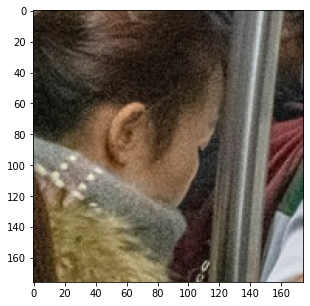

In [345]:
model_b0_name = 'efficientnet-b0'
model_b0_path = 'PretrainedModels/Ours/ef_b0.pth'
b0_model = init_ef_model(model_b0_name, model_b0_path)
image = cv2.imread('TestDataset/CroppedFaces/0/5_f.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
im_pil = Image.fromarray(image)
image_data = transform_efnet(im_pil).unsqueeze(0)

# model.cuda()
# Set layers such as dropout and batchnorm in evaluation mode
# model.eval();

# Get the 1000-dimensional model output
with torch.no_grad():
    out = b0_model(image_data)
print(out.detach().numpy()[0][0])  
fig=plt.figure(figsize=(5, 5))
plt.imshow(image)
#return out.detach().numpy()[0][0]

In [11]:
import matplotlib.pyplot as plt


In [5]:
def draw_rects(image, boxes):
    for (x1, y1, x2, y2) in boxes:
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (2, 255, 0), 1)
    return image

In [6]:
img = cv2.imread('TestDataset/RawData/Screenshot_54.jpg')
boxes = detect_faces(img)

In [7]:
img = draw_rects(img, boxes)

In [ ]:
fig=plt.figure(figsize=(5, 5))
plt.imshow(convert2RGB(img))

In [235]:
img = draw_rects(img, boxes)

In [8]:

import sys
sys.path.insert(0,'C:/Users/fzhil/source/repos/CropFacesWithCenterFace/CenterFaceDetection/bin/x64/Debug/')

In [13]:
x = clr.CenterFaceDetection.Class1.DetectFaces("C:/Users/fzhil/Documents/CurrentEdu/ForensicGenderSex/TestDataset/RawData/7_Cheering_Cheering_7_542.jpg")

AttributeError: module 'clr' has no attribute 'CenterFaceDetection'

In [16]:
[x[1][0], x[0][1], x[0][2], x[0][3]]

[513, 318, 275, 274]

In [9]:
import clr
clr.AddReference("C:/Users/fzhil/source/repos/CropFacesWithCenterFace/CenterFaceDetection/bin/x64/Debug/CenterFaceDetection.dll")

def detect_faces_clr(image_path):
    boxes = []
    res = clr.CenterFaceDetection.Class1.DetectFaces("C:/Users/fzhil/Documents/CurrentEdu/ForensicGenderSex/" + image_path) 
    for face in res:
        boxes.append([face[0], face[1], face[2], face[3]])
    return boxes

In [11]:
detect_faces_clr('TestDataset/RawData/00china-surveillance-1-promo-superJumbo-v2.jpg')

[[1037, 490, 56, 56],
 [964, 449, 50, 50],
 [961, 538, 63, 63],
 [1219, 499, 77, 77],
 [1084, 623, 107, 107],
 [1263, 729, 117, 118]]